# Parte de python (ignorar)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# filtramos los datos de guanajuato
mexico = pd.read_csv("../datos/210109COVID19MEXICO.csv", engine='python')

mexico[mexico.ENTIDAD_RES==11].to_csv("../datos/guanajuato.csv", index=False)

KeyboardInterrupt: 

### Guanajuato
Creamos las variables para generar el índice presentado a niver Guanajuato.

In [23]:
GUANAJUATO = pd.read_csv("../datos/guanajuato.csv", parse_dates=["FECHA_SINTOMAS", "FECHA_INGRESO"])
display(GUANAJUATO.head(3))

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-01-09,0386e9,1,12,12,2,12,12,29,2,...,2,1,1,2,97,3,99,México,97,1
1,2021-01-09,05a196,2,4,12,2,20,12,29,2,...,99,1,1,2,97,3,99,México,97,2
2,2021-01-09,1d2de1,2,12,12,1,12,12,29,1,...,2,1,1,2,97,3,99,México,97,97


In [24]:
GUANAJUATO_POSITIVOS.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [25]:
# filtramos casos positivos y graficamos el número total de casos
GUANAJUATO_POSITIVOS = GUANAJUATO[GUANAJUATO.CLASIFICACION_FINAL.isin([1,2,3])]

In [63]:
GUANAJUATO_POSITIVOS

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-01-09,0386e9,1,12,12,2,12,12,29,2,...,2,1,1,2,97,3,99,México,97,1
1,2021-01-09,05a196,2,4,12,2,20,12,29,2,...,99,1,1,2,97,3,99,México,97,2
2,2021-01-09,1d2de1,2,12,12,1,12,12,29,1,...,2,1,1,2,97,3,99,México,97,97
3,2021-01-09,1b6863,1,4,12,2,12,12,1,2,...,99,1,1,2,97,3,99,México,97,2
4,2021-01-09,16b1a8,2,4,12,1,12,12,1,1,...,99,1,1,2,97,3,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52316,2021-01-09,2c2ac8,2,12,9,1,12,12,66,2,...,99,2,97,1,1,3,99,México,97,2
52446,2021-01-09,453d24,2,4,12,2,12,12,1,1,...,2,1,3,1,1,3,99,México,97,97
52453,2021-01-09,338380,1,6,12,1,12,12,29,1,...,2,2,97,1,2,1,99,México,97,97
52530,2021-01-09,340c8d,1,6,12,2,12,12,29,1,...,2,2,97,1,1,3,99,México,97,97


In [83]:
DIARIOS_GUANAJUATO = GUANAJUATO_POSITIVOS.groupby("FECHA_INGRESO", as_index=True).size()

n_unique_dates = len(DIARIOS_GUANAJUATO.index.unique())

fig = plt.figure(figsize=(n_unique_dates/5, n_unique_dates/10))

ax = DIARIOS_GUANAJUATO.plot.bar(x="FECHA_INGRESO", y="n", color='blue')
ax.set_xticklabels(labels=DIARIOS_GUANAJUATO.index, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['n']);

plt.tight_layout()

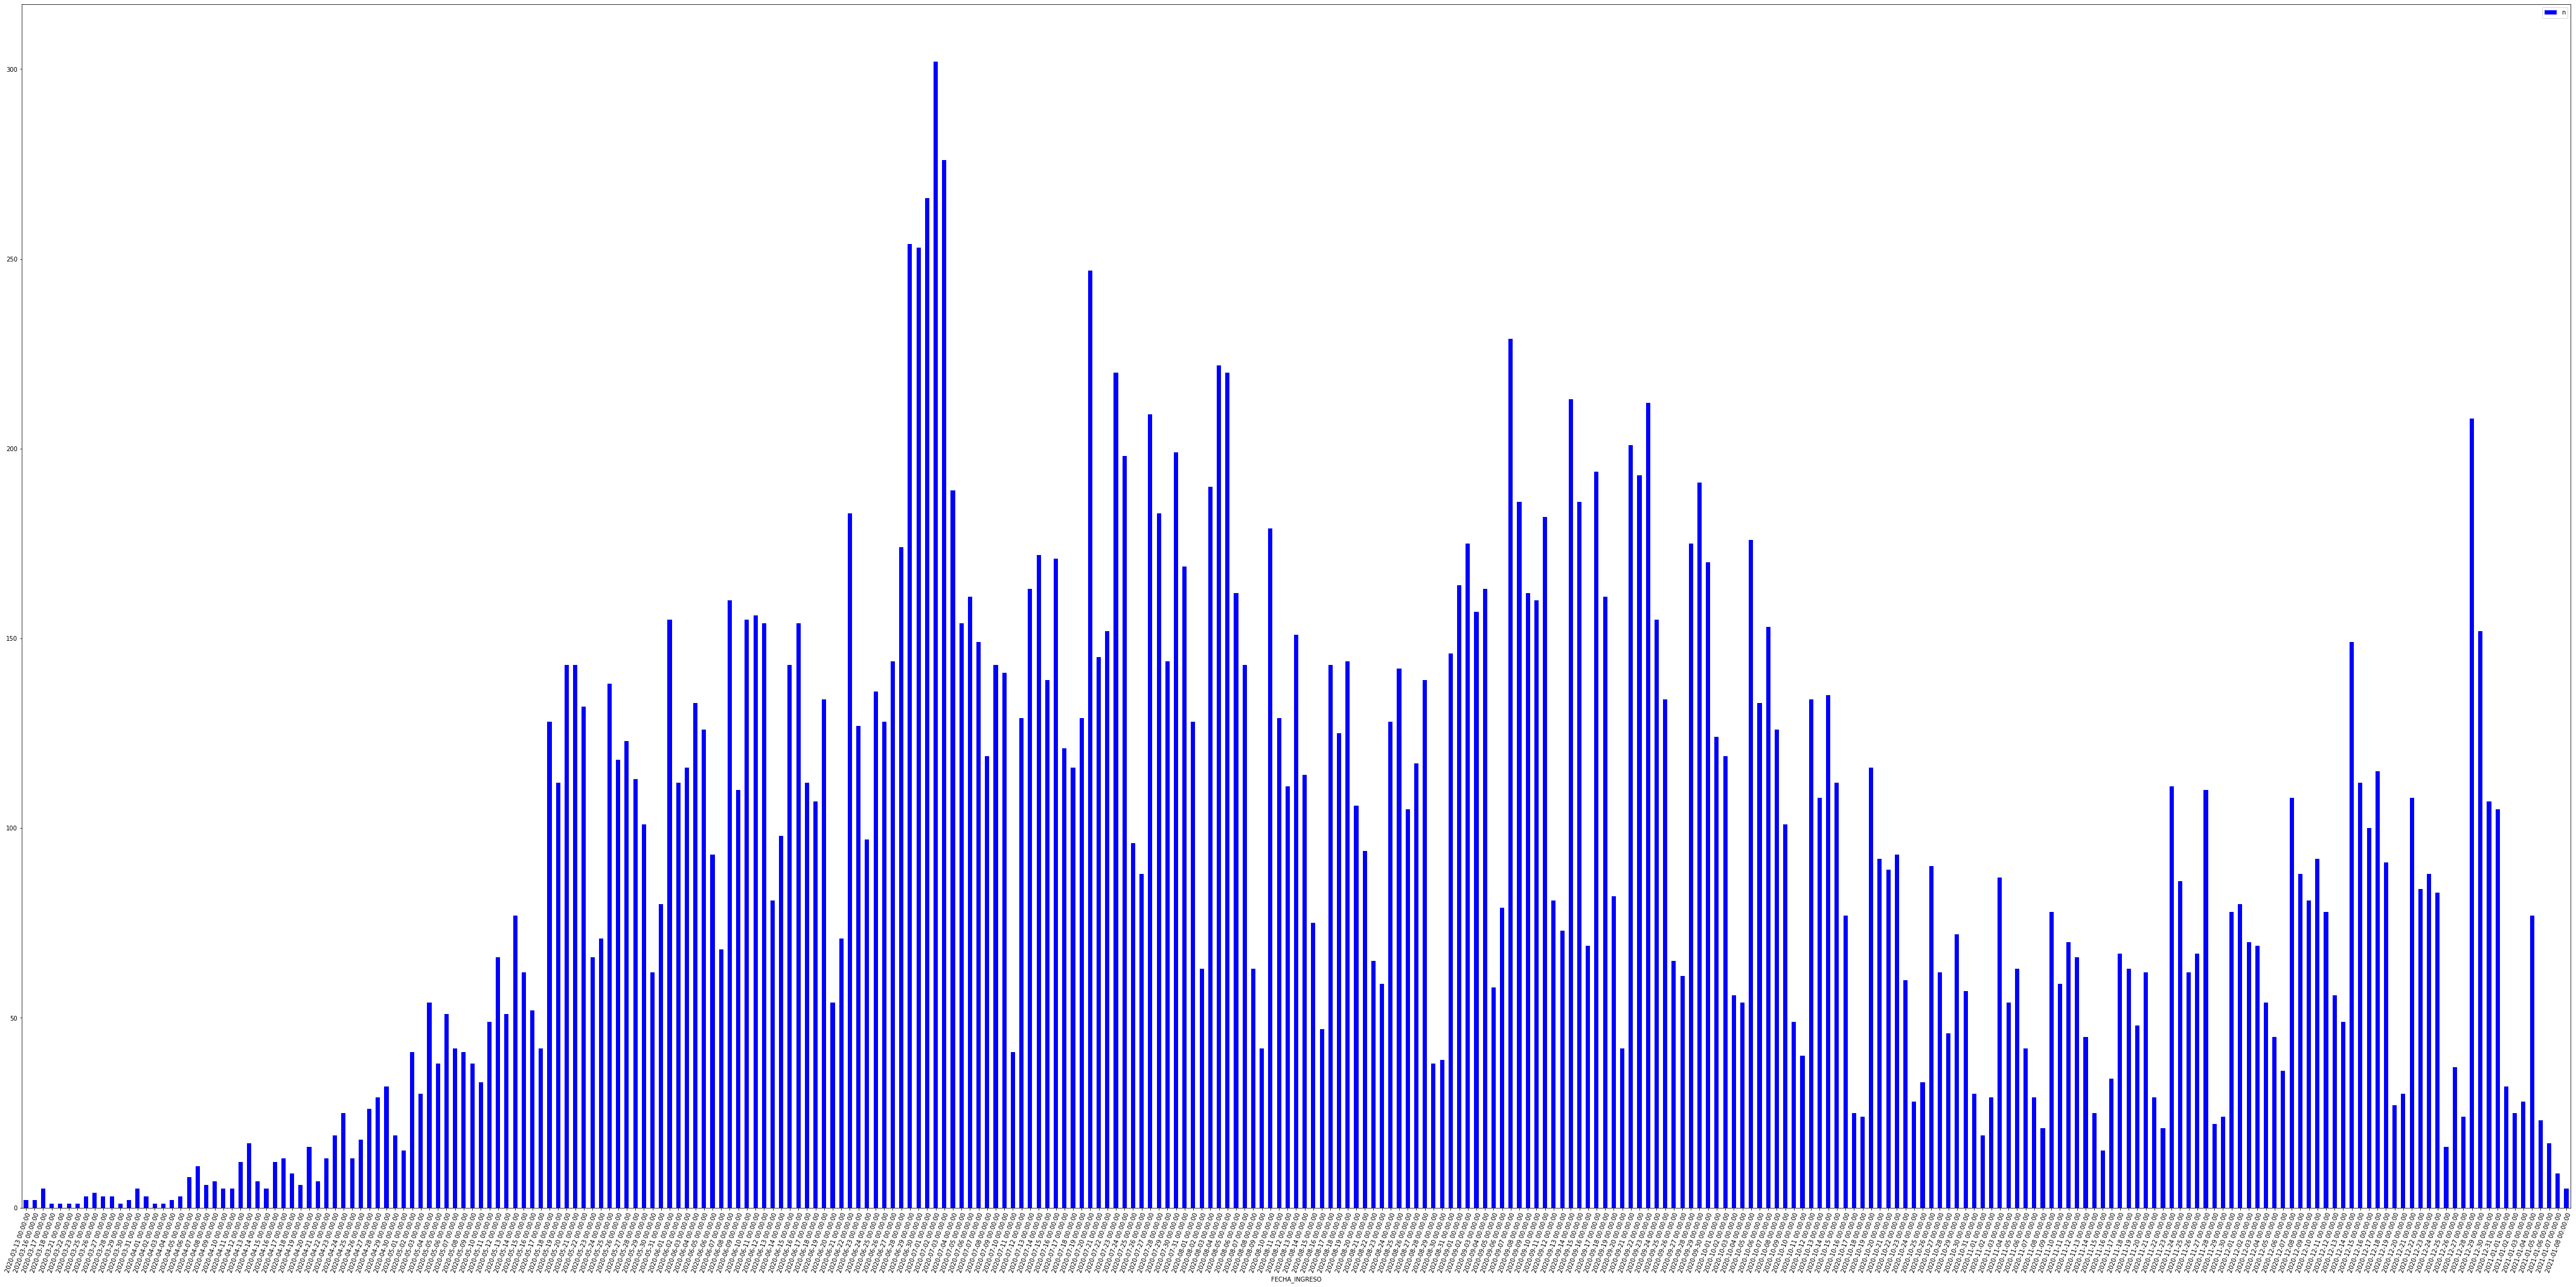

In [86]:
n_unique_dates = len(DIARIOS_GUANAJUATO.index.unique())

fig = plt.figure(figsize=(n_unique_dates/5, n_unique_dates/10))

ax = DIARIOS_GUANAJUATO.plot.bar(x="FECHA_INGRESO", y="n", color='blue')
ax.set_xticklabels(labels=DIARIOS_GUANAJUATO.index, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['n']);

plt.tight_layout()

# Análisis con R (el bueno)

In [1]:
#Cargar entorno de R
%load_ext rpy2.ipython

In [2]:
%%R
## functions auxiliares

# creamos los lags de los conteos.
crear_suma_total_lags <- function(n, df, col){
  df["n_total"] <- df$n # inicializamos el valor de total
  for(i in 3:n){
    df[paste0("n_",i)] <- shift(df$n, n=i) # creamos el primer lag
    df[is.na(df)] <- 0 # imputamos con cero.
    df["n_total"] <- df["n_total"]+df[paste0("n_",i)] # sumamos el total
    df["n_total"] <- df["n_total"]+df["n_total"]*3/14 
  }
    if (col==1){ # graficamos los totales.
        g <- ggplot(df, aes(x=FECHA_INGRESO, y=n_total))+
            geom_col(col="blue",fill="blue") 
    }
    else{
        g <- ggplot(df, aes(x=FECHA_SINTOMAS, y=n_total))+
            geom_col(col="blue",fill="blue") 
    }
    #plot(g)
  df # retornamos el nuevo data.frame
}

# función para crear la media movil
media_movil <- function(df, k, m, col){
    if (col==1){
        df_mv <- df %>%
                    select(FECHA_INGRESO, n) %>%
                    mutate(x_mv = rollmean(n, k = k, fill = NA))
        df_mv["n_lag_m"] <- shift(df_mv$x_mv, n=m)
        df_mv <- df_mv[!is.na(df_mv$n_lag_m),]
        df_mv["D"] <- df_mv["x_mv"]/df_mv["n_lag_m"] 
        df_mv["Dn"] <- df_mv["n"]/df_mv["n_lag_m"] 
    }
    else if(col==0){
        df_mv <- df %>%
                    select(FECHA_SINTOMAS, n) %>%
                    mutate(x_mv = rollmean(n, k = k, fill = NA))
        df_mv["n_lag_m"] <- shift(df_mv$x_mv, n=m)
        df_mv <- df_mv[!is.na(df_mv$n_lag_m),]
        df_mv["D"] <- df_mv["x_mv"]/df_mv["n_lag_m"]
        df_mv["Dn"] <- df_mv["n"]/df_mv["n_lag_m"] 
    }
    else{
        df_mv <- df %>%
                    select(FECHA_DEF, n) %>%
                    mutate(x_mv = rollmean(n, k = k, fill = NA))
        df_mv["n_lag_m"] <- shift(df_mv$x_mv, n=m)
        df_mv <- df_mv[!is.na(df_mv$n_lag_m),]
        df_mv["D"] <- df_mv["x_mv"]/df_mv["n_lag_m"]
        df_mv["Dn"] <- df_mv["n"]/df_mv["n_lag_m"] 
    }
    df_mv
}

# cargamos la librerias
library(tidyverse)
library(lubridate)
library(data.table)
library(zoo)
library(gridExtra)
library(data.table)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


R[write to console]: data.table 1.13.6 using 2 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


R[write to console]: The following objects are maske

In [3]:
%%R
mexico = fread("../datos/210109COVID19MEXICO.csv")


R[write to console]: |--------------------------------------------------|
|
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [6]:
%%R
guanajuato = mexico[mexico$ENTIDAD_RES==11]
write_csv(guanajuato,"../datos/guanajuato.csv")

In [7]:
%%R
# cargamos los datos de guanajuato.csv
guanajuato <- read.csv("../datos/guanajuato.csv", header=T, 
                       colClasses=c(FECHA_SINTOMAS="Date",
                                    FECHA_INGRESO="Date"))

# filtramos los datos confirmados
confirmados_guanajuato <- guanajuato %>% 
  filter(CLASIFICACION_FINAL %in% c(1,2,3))

In [8]:
%%R
nrow(confirmados_guanajuato)

[1] 88344


# Utilizamos la fecha de ingreso

In [9]:
%%R
confirmados_c_guanajuato <- confirmados_guanajuato %>% group_by(FECHA_INGRESO) %>% count()

fechas <- seq.Date(from=as.Date("2020-03-13"), to=as.Date("2021-01-08"), by=1)
fechas_totales <- data.frame(fechas)

totales_guanajuato_completo <- merge(confirmados_c_guanajuato, fechas_totales, 
                                     by.x="FECHA_INGRESO", by.y = "fechas", all = T)

totales_guanajuato_completo[is.na(totales_guanajuato_completo)] <- 0 

totales_guanajuato_lags_ingreso <- crear_suma_total_lags(14, totales_guanajuato_completo, 1)

In [10]:
%%R
confirmados_s_guanajuato <- confirmados_guanajuato %>% group_by(FECHA_SINTOMAS) %>% count()

fechas <- seq.Date(from=as.Date(min(confirmados_s_guanajuato$FECHA_SINTOMAS)), to=as.Date("2021-01-08"), by=1)
fechas_totales <- data.frame(fechas)

totales_guanajuato_completo <- merge(confirmados_s_guanajuato, fechas_totales, 
                                     by.x="FECHA_SINTOMAS", by.y = "fechas", all = T)

totales_guanajuato_completo[is.na(totales_guanajuato_completo)] <- 0 

totales_guanajuato_lags_sintomas <- crear_suma_total_lags(18, totales_guanajuato_completo, 0)

In [11]:
%%R
borrador1 <- merge(totales_guanajuato_lags_ingreso%>% select(FECHA_INGRESO, n_total), 
            totales_guanajuato_lags_sintomas%>% select(FECHA_SINTOMAS, n_total), by.x="FECHA_INGRESO", by.y="FECHA_SINTOMAS")

borrador1 <- borrador1 %>%
    mutate(total=n_total.y-n_total.x) 

borrador1 %>% head()

# no funciono debido a que había valores negativos

  FECHA_INGRESO n_total.x n_total.y     total
1    2020-03-13 10.276628  22.34262  12.06600
2    2020-03-14  0.000000  85.42768  85.42768
3    2020-03-15 20.553256 126.86590 106.31265
4    2020-03-16 30.829883 295.04724 264.21736
5    2020-03-17  8.463105 196.98056 188.51745
6    2020-03-18 37.799500 200.33317 162.53367


# Casos reportados

$x_i$: número **total** en el día i.

$X(t)=\frac{1}{7}\sum_{i=t-3}^{t+3}x_i$

$D=\frac{X(t)}{X(t-13)}$


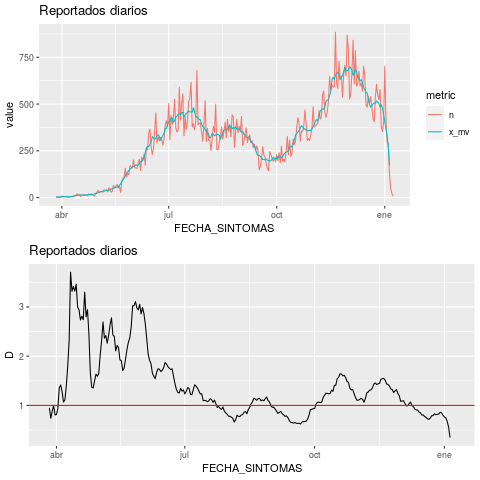

In [12]:
%%R
guanajuto_media_movil <- media_movil(totales_guanajuato_completo, 7, 14, 0)
p1 <- guanajuto_media_movil %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()+
  labs(title="Reportados diarios")

p2 <- ggplot(guanajuto_media_movil, aes(FECHA_SINTOMAS, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")+
  labs(title="Reportados diarios")

grid.arrange(p1, p2, ncol=1)

In [13]:
%%R
guanajuto_media_movil_aux <- guanajuto_media_movil %>%
    gather(metric, value, x_mv)
guanajuto_media_movil$D <- guanajuto_media_movil$D*300
guanajuto_media_movil <- guanajuto_media_movil %>% filter(D<1500)

guanajuto_media_movil["D_lag_1"] <- shift(guanajuto_media_movil$D, n=1)
guanajuto_media_movil <- guanajuto_media_movil %>%
                        mutate(change_point= ((D<=300)&(D_lag_1>300))|((D>=300)&(D_lag_1<300)) )

fechas_cruce <- guanajuto_media_movil %>% filter(change_point) %>% select(FECHA_SINTOMAS)
fechas_cruce <- c(fechas_cruce$FECHA_SINTOMAS-1,fechas_cruce$FECHA_SINTOMAS)

change_point_D <- guanajuto_media_movil %>% filter(FECHA_SINTOMAS%in%fechas_cruce) %>% select(FECHA_SINTOMAS,D)
change_point <- guanajuto_media_movil_aux %>% filter(FECHA_SINTOMAS %in%fechas_cruce) %>% select(FECHA_SINTOMAS,value)

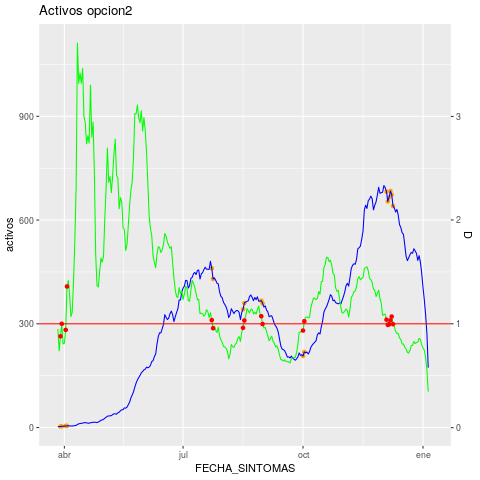

In [14]:
%%R
ggplot() +
    geom_point(data=change_point,aes(FECHA_SINTOMAS, value), color = "orange", size=1.5)+
    geom_line(data=guanajuto_media_movil_aux,aes(FECHA_SINTOMAS, value), color = "blue")+
    geom_line(data=guanajuto_media_movil, aes(FECHA_SINTOMAS, D), color="green")+
    geom_point(data=change_point_D, aes(FECHA_SINTOMAS, D), color="red", size=1.5)+ 
    geom_hline(yintercept=300, color="red")+
    labs(title="Activos opcion2")+
    scale_y_continuous(name="activos", sec.axis=sec_axis(~./300, name="D"))

### Casos activos
1. Caso activos: fecha de ingreso -14 días atras. (suavizados y no suavizados)
2. Caso activos_esperada: fecha de sintomas hasta la fecha de ingreso, si es mayor a 14 días recortamos la ventana a fecha de ingreso-14 días.
3. Caso activos_esperada_2: fecha de sintomas -3 hasta la fecha de ingreso, si es mayor a 14 días recortamos la ventana a fecha de ingreso-14 días.

### Muertos
1. Comparar este caso. 

# Definición nueva

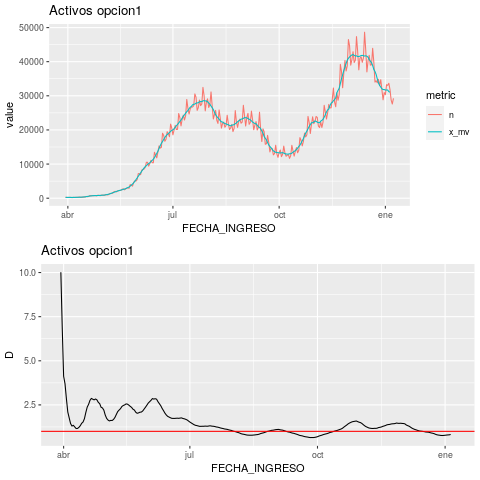

In [65]:
%%R
confirmados_c_guanajuato <- confirmados_guanajuato %>% group_by(FECHA_INGRESO) %>% count()

fechas <- seq.Date(from=as.Date("2020-03-13"), to=as.Date("2021-01-08"), by=1)
fechas_totales <- data.frame(fechas)

totales_guanajuato_completo <- merge(confirmados_c_guanajuato, fechas_totales, 
                                     by.x="FECHA_INGRESO", by.y = "fechas", all = T)

totales_guanajuato_completo[is.na(totales_guanajuato_completo)] <- 0 

totales_guanajuato_lags_ingreso <- crear_suma_total_lags(14, totales_guanajuato_completo, 1)
head(totales_guanajuato_lags_ingreso)

guanajuato_activos <- totales_guanajuato_lags_ingreso %>% select(FECHA_INGRESO, n_total)
names(guanajuato_activos) <- c("FECHA_INGRESO", "n")

guanajuto_activos1 <- media_movil(guanajuato_activos, 7, 14, 1)
p3 <- guanajuto_activos1 %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_INGRESO, value, color = metric)) +
  geom_line()+
  labs(title="Activos opcion1")

p4 <- ggplot(guanajuto_activos1, aes(FECHA_INGRESO, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")+
  labs(title="Activos opcion1")

grid.arrange(p3, p4, ncol=1)

In [66]:
%%R
factor <- 12500/4
guanajuato_activos1_aux <- guanajuto_activos1 %>%
    gather(metric, value, x_mv)
#guanajuto_activos1$D <- guanajuto_activos1$D*factor
#guanajuto_activos1 <- guanajuto_activos1 %>% filter(D<15000)

guanajuto_activos1["D_lag_1"] <- shift(guanajuto_activos1$D, n=1)
guanajuto_activos1 <- guanajuto_activos1 %>%
                        mutate(change_point= ((D<=1)&(D_lag_1>1)) | ((D>1)&(D_lag_1<1)) )

fechas_cruce <- guanajuto_activos1 %>% filter(change_point) %>% select(FECHA_INGRESO)
fechas_cruce <- fechas_cruce$FECHA_INGRESO

change_point_D <- guanajuto_activos1 %>% filter(FECHA_INGRESO%in%fechas_cruce) %>% select(FECHA_INGRESO,D)
change_point <- guanajuato_activos1_aux %>% filter(FECHA_INGRESO %in%fechas_cruce) %>% select(FECHA_INGRESO,value)

In [67]:
%%R
head(change_point)

  FECHA_INGRESO    value
1    2020-08-03 27002.75
2    2020-08-26 22402.62
3    2020-09-09 22073.10
4    2020-10-13 13476.27
5    2020-12-16 41607.67


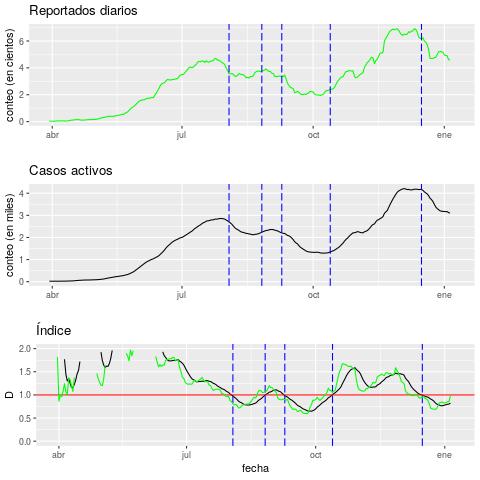

In [68]:
%%R
p_casos <- ggplot()+
    geom_line(data=guanajuato_activos1_aux,aes(FECHA_INGRESO, value/10000), color = "black")+
    labs(title="Casos activos", y="conteo (en miles)", x=" ")


p_activos <- ggplot() +
    geom_line(data=guanajuto_activos1, aes(FECHA_INGRESO, D), color="black")+
    geom_hline(yintercept=1, color="red")+
    labs(title="Índice", x="fecha")

guanajuto_media_movil <- media_movil(totales_guanajuato_completo, 7, 14, 1)
p1 <- guanajuto_media_movil %>%
  gather(metric, value, x_mv) %>%
  ggplot(aes(FECHA_INGRESO, value/100, color = metric)) +
  geom_line(color="green")+
  labs(title="Reportados diarios")+
  theme(legend.position = "none")+
  labs(y="conteo (en cientos)", x=" ")

for (i in change_point$FECHA_INGRESO){
    p1 <- p1+ 
        geom_vline(xintercept=as.Date(i), color='blue', linetype = "longdash")
    
    p_activos <- p_activos +
    geom_vline(xintercept=as.Date(i), color='blue', linetype = "longdash")
    
   p_casos <- p_casos +
    geom_vline(xintercept=as.Date(i), color='blue', linetype = "longdash")
}
p_activos <- p_activos+
    xlim(min(guanajuato_activos1_aux$FECHA_INGRESO), 
            max(guanajuato_activos1_aux$FECHA_INGRESO))+
    ylim(0,2)+
    geom_line(data=guanajuto_media_movil, aes(FECHA_INGRESO, D), color="green")

p_casos <- p_casos+
    xlim(min(guanajuato_activos1_aux$FECHA_INGRESO), 
            max(guanajuato_activos1_aux$FECHA_INGRESO))


grid.arrange(p1, p_casos, p_activos, ncol=1)

### Opción 1. Caso activos

In [373]:
%%R
fechas <- seq.Date(from=as.Date(min(confirmados_s_guanajuato$FECHA_SINTOMAS)), to=as.Date("2021-01-08"), by=1)
casos_activos1 <- data.frame(fechas)
casos_activos1$n_activo <- 0

for (i in 1:nrow(casos_activos1)){
    total_i<- confirmados_guanajuato %>% filter(between(as.Date(casos_activos1[i, "fechas"]),FECHA_INGRESO-14, FECHA_INGRESO)) %>% count()
    casos_activos1[i,"n_activo"] <- total_i$n
}
names(casos_activos1) <- c("FECHA_SINTOMAS", "n")

guanajuto_activos1 <- media_movil(casos_activos1, 7, 14, 0)
p3 <- guanajuto_activos1 %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()+
  labs(title="Activos opcion1")

p4 <- ggplot(guanajuto_activos1, aes(FECHA_SINTOMAS, Dn))+
    geom_line()+
    geom_hline(yintercept=1, color="red")+
  labs(title="Activos opcion1")

grid.arrange(p3, p4, ncol=1)

### Opción 2. Caso_activos_esperada

In [272]:
%%R
confirmados_1 <- confirmados_guanajuato %>%
    select(FECHA_SINTOMAS, FECHA_INGRESO, FECHA_DEF, TIPO_PACIENTE) %>%
    mutate(diferencia=FECHA_INGRESO-FECHA_SINTOMAS) 

confirmados_1[confirmados_1$diferencia>14,"FECHA_SINTOMAS"] <- confirmados_1[confirmados_1$diferencia>14,"FECHA_INGRESO"]-13

casos_activos_esperada <- data.frame(fechas)
casos_activos_esperada$n_activo <- 0

for (i in 1:nrow(casos_activos_esperada)){
    total_i<- confirmados_1 %>% filter(between(as.Date(casos_activos_esperada[i, "fechas"]),FECHA_SINTOMAS, FECHA_INGRESO)) %>% count()
    casos_activos_esperada[i,"n_activo"] <- total_i$n
    
}

names(casos_activos_esperada) <-c("FECHA_SINTOMAS", "n")

guanajuto_activos2 <- media_movil(casos_activos_esperada, 7, 14, 0)

In [273]:
%%R
factor <- 900
guanajuato_activos2_aux <- guanajuto_activos2 %>%
    gather(metric, value, x_mv)
guanajuto_activos2$D <- guanajuto_activos2$D*800
guanajuto_activos2 <- guanajuto_activos2 %>% filter(D<1500)

guanajuto_activos2["D_lag_1"] <- shift(guanajuto_activos2$D, n=1)
guanajuto_activos2 <- guanajuto_activos2 %>%
                        mutate(change_point= ((D<=800)&(D_lag_1>800))|((D>=800)&(D_lag_1<800)) )

fechas_cruce <- guanajuto_activos2 %>% filter(change_point) %>% select(FECHA_SINTOMAS)
fechas_cruce <- c(fechas_cruce$FECHA_SINTOMAS-1,fechas_cruce$FECHA_SINTOMAS)

change_point_D <- guanajuto_activos2 %>% filter(FECHA_SINTOMAS%in%fechas_cruce) %>% select(FECHA_SINTOMAS,D)
change_point <- guanajuato_activos2_aux %>% filter(FECHA_SINTOMAS %in%fechas_cruce) %>% select(FECHA_SINTOMAS,value)

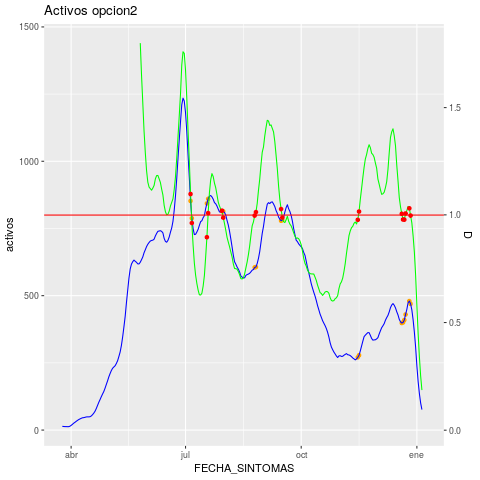

In [319]:
%%R
ggplot() +
    geom_point(data=change_point,aes(FECHA_SINTOMAS, value), color = "orange", size=1.5)+
    geom_line(data=guanajuato_activos2_aux,aes(FECHA_SINTOMAS, value), color = "blue")+
    geom_line(data=guanajuto_activos2, aes(FECHA_SINTOMAS, D), color="green")+
    geom_point(data=change_point_D, aes(FECHA_SINTOMAS, D), color="red", size=1.5)+ 
    geom_hline(yintercept=800, color="red")+
    labs(title="Activos opcion2")+
    scale_y_continuous(name="activos", sec.axis=sec_axis(~./800, name="D"))

### Opción 3: Caso_activos_esperadas

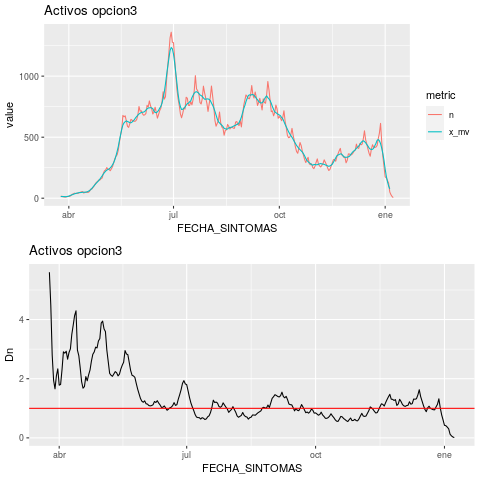

In [233]:
%%R
confirmados_3 <- confirmados_guanajuato %>%
    select(FECHA_SINTOMAS, FECHA_INGRESO, FECHA_DEF, TIPO_PACIENTE) %>%
    mutate(diferencia=FECHA_INGRESO-(FECHA_SINTOMAS-3)) 

confirmados_3[confirmados_3$diferencia>14,"FECHA_SINTOMAS"] <- confirmados_3[confirmados_3$diferencia>14,"FECHA_INGRESO"]-13

casos_activos_esperada3 <- data.frame(fechas)
casos_activos_esperada3$n_activo <- 0

for (i in 1:nrow(casos_activos_esperada3)){
    total_i<- confirmados_3 %>% filter(between(as.Date(casos_activos_esperada3[i, "fechas"]),FECHA_SINTOMAS, FECHA_INGRESO)) %>% count()
    casos_activos_esperada3[i,"n_activo"] <- total_i$n
    
}

names(casos_activos_esperada3) <-c("FECHA_SINTOMAS", "n")

guanajuto_activos3 <- media_movil(casos_activos_esperada3, 7, 14, 0)
p7 <- guanajuto_activos3 %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_SINTOMAS, value, color = metric)) +
  geom_line()+
  labs(title="Activos opcion3")

p8 <- ggplot(guanajuto_activos3, aes(FECHA_SINTOMAS, Dn))+
    geom_line()+
    geom_hline(yintercept=1, color="red")+
  labs(title="Activos opcion3")

grid.arrange(p7, p8, ncol=1)

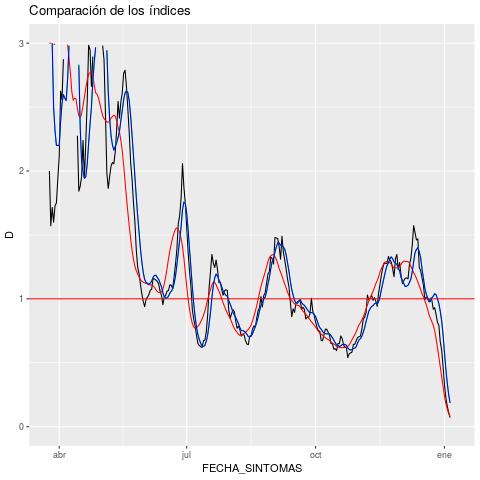

In [234]:
%%R
ggplot(guanajuto_media_movil, aes(FECHA_SINTOMAS, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")+
    geom_line(data=guanajuto_activos1, aes(FECHA_SINTOMAS, D), color="red")+
    geom_line(data=guanajuto_activos2, aes(FECHA_SINTOMAS, D), color="green")+
    geom_line(data=guanajuto_activos3, aes(FECHA_SINTOMAS, D), color="blue")+
  labs(title="Comparación de los índices")+
    ylim(0,3)

# NEGRO: casos reportados diarios.
# ROJO-Caso activos: fecha de ingreso -14 días atras. (suavizados y no suavizados)
# Green-Caso activos_esperada: fecha de sintomas hasta la fecha de ingreso, si es mayor a 14 días recortamos la ventana a fecha de ingreso-14 días.
# BLUE-Caso activos_esperada_2: fecha de sintomas -7 hasta la fecha de ingreso, si es mayor a 14 días recortamos la ventana a fecha de ingreso-14 días.

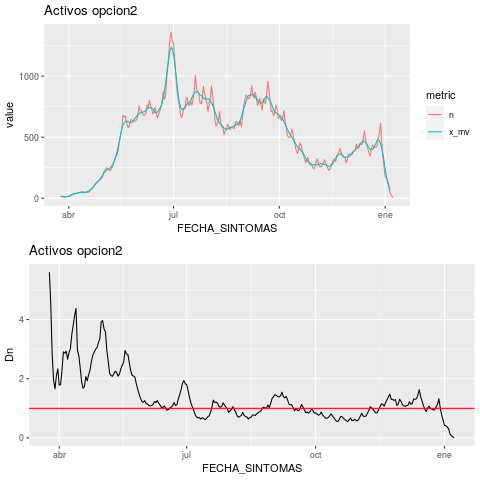

In [229]:
%%R
grid.arrange(p5, p6, ncol=1)

In [224]:
%%R
guanajuto_media_movil_activos %>% filter(FECHA_SINTOMAS>as.Date("2020-11-10")) %>%
    head()

  FECHA_SINTOMAS   n     x_mv  n_lag_m        D       Dn
1     2020-11-11 804 795.5714 751.2857 1.058947 1.070165
2     2020-11-12 801 812.4286 746.7143 1.088005 1.072699
3     2020-11-13 845 825.4286 737.8571 1.118683 1.145208
4     2020-11-14 822 843.8571 738.8571 1.142111 1.112529
5     2020-11-15 821 862.2857 735.2857 1.172722 1.116573
6     2020-11-16 884 882.0000 728.0000 1.211538 1.214286


### Muertos

In [25]:
%%R
muertos_guanajuato <- confirmados_guanajuato %>% filter(FECHA_DEF!="9999-99-99")
muertos_guanajuato$FECHA_DEF <- as.Date(muertos_guanajuato$FECHA_DEF)

muertos_c_guanajuato <- muertos_guanajuato %>% group_by(FECHA_DEF) %>% count()

fechas <- seq.Date(from=as.Date("2020-03-13"), to=as.Date("2021-01-08"), by=1)
fechas_totales <- data.frame(fechas)

totales_guanajuato_completo_muertos <- merge(muertos_c_guanajuato, fechas_totales, 
                                     by.x="FECHA_DEF", by.y = "fechas", all = T)

totales_guanajuato_completo_muertos[is.na(totales_guanajuato_completo_muertos)] <- 0 


head(totales_guanajuato_completo_muertos)

   FECHA_DEF n
1 2020-03-13 0
2 2020-03-14 0
3 2020-03-15 0
4 2020-03-16 0
5 2020-03-17 0
6 2020-03-18 0


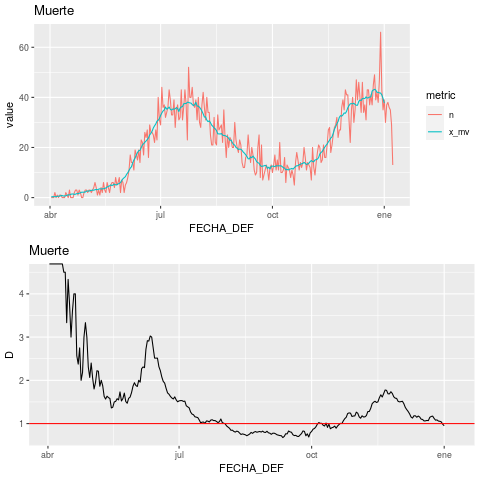

In [26]:
%%R
guanajuto_muertos_media_movil <- media_movil(totales_guanajuato_completo_muertos, 14, 14, 3)
p_m_muerto <- guanajuto_muertos_media_movil %>%
  gather(metric, value, n:x_mv) %>%
  ggplot(aes(FECHA_DEF, value, color = metric)) +
  geom_line()+
  labs(title="Muerte")

p_d_muerto <- ggplot(guanajuto_muertos_media_movil, aes(FECHA_DEF, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")+
  labs(title="Muerte")

grid.arrange(p_m_muerto, p_d_muerto, ncol=1)

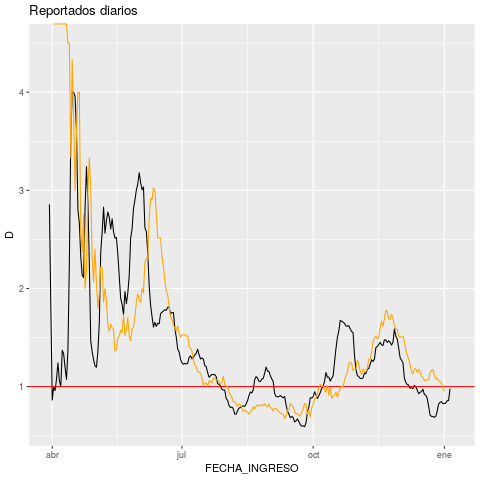

In [28]:
%%R
ggplot(guanajuto_media_movil, aes(FECHA_INGRESO, D))+
    geom_line()+
    geom_hline(yintercept=1, color="red")+
    #geom_line(data=guanajuto_activos1, aes(FECHA_SINTOMAS, D), color="red")+
    #geom_line(data=guanajuto_activos2, aes(FECHA_SINTOMAS, D), color="green")+
    #geom_line(data=guanajuto_activos3, aes(FECHA_SINTOMAS, D), color="blue")+
    geom_line(data=guanajuto_muertos_media_movil, aes(FECHA_DEF, D), color="orange")+
  labs(title="Reportados diarios")

# NEGRO: casos reportados diarios.
# ROJO-Caso activos: fecha de ingreso -14 días atras. (suavizados y no suavizados)
# Green-Caso activos_esperada: fecha de sintomas hasta la fecha de ingreso, si es mayor a 14 días recortamos la ventana a fecha de ingreso-14 días.
# BLUE-Caso activos_esperada_2: fecha de sintomas -7 hasta la fecha de ingreso, si es mayor a 14 días recortamos la ventana a fecha de ingreso-14 días.
# Naranja-Muertos reportados.

## Razon de casos activos entre casos reportados diarios

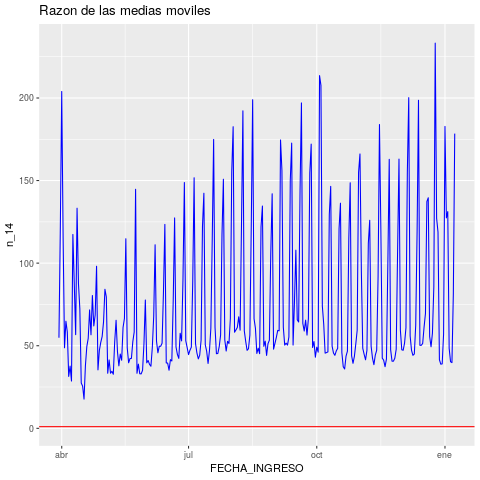

In [51]:
%%R
g_razon_1<- merge(guanajuto_media_movil, guanajuto_activos1, by="FECHA_INGRESO") %>%
    mutate(n_14 = n.y/n.x,
          n_13 =  n.y/(n.x*13),
          n_15 =  n.y/(n.x*15))%>%
  ggplot() +
  geom_line(aes(FECHA_INGRESO, n_14), color="blue")+
  #geom_line(aes(FECHA_SINTOMAS, n_13), color="red")+
  #geom_line(aes(FECHA_SINTOMAS, n_15), color="orange")+
  labs(title="Razon de las medias moviles")+
  geom_hline(yintercept=1, color="red")
g_razon_1

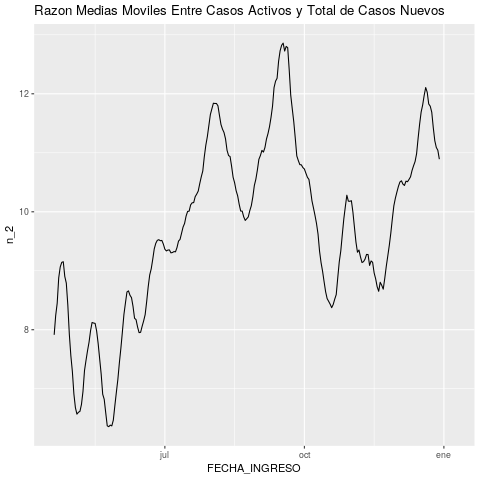

In [72]:
%%R
guanajuto_media_movil_2 <- guanajuto_media_movil
guanajuto_media_movil_2$n <- guanajuto_media_movil$x_mv
guanajuto_media_movil_2 <- media_movil(guanajuto_media_movil_2, 14, 14, 1)


g_razon_1<- merge(guanajuto_media_movil_2, guanajuto_activos1, by="FECHA_INGRESO") %>%
    mutate(n_2 = x_mv.y/x_mv.x/6)%>%
  ggplot(aes(FECHA_INGRESO, n_2)) +
  geom_line()+
  labs(title="Razon Medias Moviles Entre Casos Activos y Total de Casos Nuevos")
g_razon_1

In [53]:
%%R
g_razon_2<-merge(guanajuto_media_movil, guanajuto_activos1, by="FECHA_INGRESO") %>%
    mutate(n_14 = n.y/n.x,
          n_13 =  n.y/(n.x*13),
          n_15 =  n.y/(n.x*15))%>%
  ggplot() +
  geom_line(aes(FECHA_INGRESO, n_14), color="blue")+
  #geom_line(aes(FECHA_SINTOMAS, n_13), color="red")+
  #geom_line(aes(FECHA_SINTOMAS, n_15), color="orange")+
  labs(title="Razon de los totales")+
  geom_hline(yintercept=1, color="red")
g_razon_2data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOx9fbAtR1Xv6vnYn+fce88NJAQDQoiBhFRS+KokKD59gKApyrJEKyBUBdBnCor3FC00FBILyZNQYKwAKqX4pMQgKBpRPkRBILxACHkPxOIzQEwIIR83uffce/b3zPT7o/eeM3um169neu99zuxz+lcUdXN6z0xPz8zq1b/1W6uFlJIcHBwcHOoHb7874ODg4OCghzPQDg4ODjWFM9AODg4ONYUz0A4ODg41xd4Z6Gc84xliBt/3n/CEJ1x//fV7dvUsXv3qV7/2ta81/ux73/teGIZ70B+Akl3de9RhcBwcDjz21IO+9tpr77///vvvv/+uu+763d/93de97nUf+chH9rIDa4rPf/7zQohvfOMb+92RGvXEweEwYE8N9JEjR84555xzzjnn8Y9//Mte9rKnP/3pt9566152YE3xpCc96d3vfve555673x2pUU8cHA4D9pODFkKkn/qHPvShSy65pNVqnXfeeYr6uPnmm9szhGF40UUXqV/edtttP/qjP7q5uXnJJZf8zd/8DRE9/PDDW1tbH//4x1/wghecd955L3nJSyaTSe5aN9988yWXXLK1tXXllVeePn1a/fHOO+987nOfe+TIkSc96Unvete7QFeL3SOi66+//nGPe1y3233Ws55111135Q5Rvbrpppue//znP/7xj//zP//zt7/97c997nPPPvvsP/mTPwEdKHZVCPHSl7602+2urifFUX3+85//O7/zO6q13+93u93bb78925MU2rvAXXJwcCgFuVe4/PLL3/CGN5w4ceLEiRP33Xffe97znvPOO++uu+6SUo5Go263e+ONN95///0f/vCHfd+/88470wNPnTr1lKc85R3veIeU8qGHHjp69OiNN9744IMP/sM//EO32/3CF75w4sSJMAxf//rXSyl7vd4555zz/ve/P3vpL3/5y41G4y//8i8feOCBP/qjPxJCXHPNNcPh8Ad/8Aevu+66Bx988GMf+9jW1taHPvSh7FH33ntvEARc9/7t3/5tY2Pj1ltvvfvuu6+44ooXv/jFufs9ceKE53nXX3+9lPLmm28WQlx33XXq30eOHJFSajug7eqJEyeIKIqiFfVEO6p/9Vd/deGFF6ozvO9977v44ovVqVRP0sHR3oWxSw4ODmWwpwY6Nzf8wR/8gWoajUZf+tKX1L+/+tWvbmxs3Hbbbeo/4zi+4oorXv7yl6v/fNe73nX55Zen57z66qt/7dd+TVmNe++9V/3x53/+55U1T/Hbv/3bv/iLv5j+50/8xE9cc801N99882WXXZb+8dprr33Vq16VPSproIvd+9CHPrS5ufkv//Ivym6eOXMmd7+qV/fdd5+U8sEHH8z9O4oibQe0Xc0a6FX0RDuqZ86cabfb//Ef/yGl/Lmf+7m3vOUtUmegtXdh7JKDg0MZ7CnF8da3vlVdNY7jT37yk6997Wu/853vEFGj0fj85z//7Gc/+4d/+Idf//rXe95ur6655pqTJ0+mK/F77733ggsuSFsvuOCCe+65R/37nHPOUf/IHq5w3333XXjhhel/PvnJTyai73znO1//+tfPneFP//RPT506pe22tntXXHHFW9/61muuuWZra+uqq6765je/qT32+PHjaZey/+Y6oO3qqnuiHdWNjY3nP//5H/jAB7a3t//1X//1JS95ifa02rso2SUHBweMYF+u6nneT/7kT1544YVf/vKXzz///I997GOve93rPvWpTz31qU8losc85jHqZzfddNN73/veO+64o9FoqL/8wA/8wMc+9rH0PN/5znfOO+889W8hBHe5xz3ucXfeeWf6n9/+9rePHz9+7rnnPu1pT/vc5z6n/vjQQw8lSaI9XNu97373u//tv/23X/3VX73//vvf/va3P/vZz3744YeLcwOAtgNve9vbil1ddU+4UX3Ri1507bXXPvGJT3zWs56VPpQyd7F4lxwcHGh/g4SdTufuu+8mogcffLDT6Zx99tkPPvjgm970pgceeOD73//+HXfc8apXvermm2/Omoaf/dmf/cpXvvLHf/zHp06d+shHPvKe97znxS9+sfFCv/RLv/TBD37wve9978mTJ//iL/7iM5/5DBH99E//9Le+9a13vvOd29vbt91226WXXnrLLbdoD9d276Mf/ejll1/+7//+72EYbmxsdDqdqgZI2wFtV1fdE25Uf+Znfuaee+65/vrrX/ayl1W6i8W75ODgQLS3QcKU4lB46Utf+uM//uNSyuFweOWVV25ubj7pSU9685vf/Na3vvXCCy+86qqrPM/byGA4HEopb7311qc//endbvfiiy9+3/veJzPEqDrtL/zCL+Q4aCnl3/3d31100UVHjhxRDPWNN94opbzjjjue+cxndrvdJz7xiW9729tyh2TjYMXunTp16pd/+ZfPOuusTqdz+eWXf/azn80drnql+lz8t+qttgPFrqaHrK4nxVFVuOqqqx796EePx+PsqbIctPYuRqMR7pKDg0MZCHngyo2Ox+Moijqdzn53hMXJkye3trb2uxdEdeqJg4NDEQfQQDs4ODgcDDhm0MHBwaGmcAbawcHBoaZwBtrBwcGhpnAG2sHBwaGmcAbawcHBoaZwBtrBwcGhpnAG2sHBwaGm2KNaHCdPnozjeJEzdLtdKWW/319Wl/YYvu+HYTgcDve7I5YIw7Db7XL1pNYCvu8HQTAajfa7I/bY2NhIkmR9vwIiarfbKpF1vztij+PHj29vby9o0LTodDq5DDvnQTs4ODjUFM5AOzg4ONQUzkA7ODg41BTOQDs4ODjUFM5AOzg4ONQUzkA7ODg41BTOQDs4ODjUFM5AOzg4ONQUzkA7ODg41BTOQDs4ODjUFM5AOzg4ONQUzkA7ODg41BTOQDs4ODjUFM5AOzg4ONQUzkA7ODg41BTOQDs4ODjUFM5AOzg4ONQUzkA7ODg4zOELXwhPnxb73QsiZ6AdHBwccnjDGzqf/Wy4370gcgbawcHBIYckEUmy350gImegHRwcHHKQkpyBdnBwcKgjkoSkdBy0g4ODQ/3gPGgHBweHmsIZaAcHB4eaIkmcgXZwcHCoJZwH7eDg4FBTOAPt4ODgUFM4FYeDg4NDTeE8aAcHB4eaQkqXSejg4OBQSzgP2sHBwaGmkJKk3O9OEJEz0A4ODg45OB20g4ODQ03hKA4HBweHmsLJ7BwcHBxqCudBOzg4ONQUzkA7ODg41BQuSOjg4OBQW7hEFQcHB4dawnnQDg4ODjWF46AdHBwcagopnczOwcHBoZZwFIeDg4NDTeEoDgcHB4eaIklcsSQHBweHWsJ50A4ODg41hTPQDg4ODjWFlMKpOBwcHBzqCOdBOzg4ONQUTmbn4ODgUFO4La8cHBwcagpHcTg4ONjjV35l87OfDfe7FwcWUlIc73cniMgZaAeHdcR993lf+Uqw3704sHCJKg4ODotA3HWX+3hXhYOzJ+F11103HA6J6MSJE1ddddVrXvOa17zmNffdd98y+ubg4KBHktB//qe/3704sKgPB22/StrZ2XnDG97wjW98Q/3nQw89dMUVV1x55ZVL6piDgwMLKemuu5yBXh3Wf0eVjY2NN7/5zZdeeqn6zwceeOC+++57xzve8alPfWo5XXNwcGAgJd1zj1eTQNbBQ3100AvFGTzPE2LK1HQ6nUsuueRpT3vajTfeePz4cWW43/3ud3/iE58got///d8/99xzF7wWETUajUVOso8QQgghWq3WfnfEEkIIz/OOHTu23x2xh3pX2+32fnfEHulX4Hn+eCx6vWOPf/x+96kiPM9rNpv73QsDpKQgaHBvu+d5R44ckSsIIyaFaWFpgeAf+ZEfUf941rOe9c1vflMZ6J/8yZ+8+OKLiajdbvd6vUXOr0yb4rvXEb7v+74/Ho/3uyOWCIKg1Wot+BD3F77ve543mUz2uyP2aLfbSZKMRqM43iDyv/rV0VlnRfvdqWpoNpvj8XgV1m2JSJKj43HU6w20rZubm4PBIF7B+qXogC7NQP/1X//1xRdffNlll91zzz0XXHCB+uMTnvCEJzzhCUR08uTJBT+MRqMhpVzfr0vNjevbfyJa6/EnoiRJgiBY61toNptJkkwmkySRGxvyW9+Sl1++ZrejHkHNDTQRRRF62yeTySoMdBjmte1LM9DPec5zbrjhhg984ANnnXXWM57xjGWd1sHBoYgkoSc+MXZCjlVA5XnXZAZZ1EC/8Y1vVP949KMf/aY3vWnh/jg4OJTCE58YOyn0KqBMc00CsO4BOzisH5KEjh6VOzu1SKY4YFCBupp40M5AOzisH6QUvl8XI3LAoEa1JjI7Z6AdHNYPUpLv1yUd+YDBGWgHB4eFICUJUX8pxFpCTXvOQDs4OFhCedA1MSIHDGraq8nqZG0qFq5zhoSDw5LhDPTq4CgOG7z5zeEf/qGrUO7gQOQM9CqhRrUmY7s2HvRw6GLWDg5TJAk5FceKMKM49rsfRLRGHnSS1EU67uCw73BBwtWhVh702hjoOK7LkDk47DscxbE6OA7aBvXZhMbBYd+hKA4i90UsH86DtkEcO4rDwWEKKcnz6mJEDhhqJbNbGwPtOGgHhyw8TzoDrfDJT4b/5/8sUeIlyBVLqookES4k4uCg4GpxZPHxjzc+/emlGWhXLMkGzoN2WBDf/a53xx0HpICyCxJmEcdiiYyEKzdqA2egHRbERz4SvvOdByTXaVYsab/7UQ9EERqK66/v3HJLhefuVBw2iGP3OjoshDg+OCxZkpDnuS9iiskEDcVXvhJ897sVVk6O4rCB86AdFkQ9lZp2hkBK8jzpvgiFKBLA4U2Sau7wzIOuxauyNgbayewcFkQNc522t8Ullxy3OFBRHE4HrYApjqqLb5fqbQNHcTgsiBq+Qv2+eOQRm2/Q1eLIAlMcSYL8a93vd/9/37E2BrrqOsXBIYcaGugosnyrXaJKFkaKo6IH7Qr2V0cc14UVclhT1HCOt45bOhVHFqugOGryqqyNga7h1+WwXqhhrhO2LBDCZRKmWE2QcNFeLQVrY6BrGOFxWC/U8BWKIiIrW+A46CwmEwLx0jhGrUU4DtoGUgqn4nBYBFW5yD1AHFvSnY6DzgIvRKqunGY/rgWhujYGuobuj8N6oYavkPKgLaYNx0FnsVyKw3nQNnCJKg5G3H23/6d/2uZaaxjGUK+0RfqMSlSp2+3sF7AYxo6Drom1WScD7V5HB4yvfc3/h39ocq1V9bB7gEUoDt+vY2LkvsCpOPYfNVyfOtQN+FOspw6arCgOV4sji8kEscxVn7urxWEDZ6AdjMA+8kEy0K7caBYmisMmSFiTsV0bA+04aAcjsAmuYbEka5mdCxJmYUr1rspBu0zC6nAetIMR+CWpoQetOGhbisMFCafACZm2xZJqMZevjYGuofvjUDcYOei6WTRrD5rIbXm1i8kEGYeqpsNRHDZw5UYdjMActJS1S/WeyewqH+gSVbKIouUHCWsytmtjoJ3MzsEII8VRt1doYZnd8ru0jnBBwv1HDUWsDnXDmlIcFtyd4qAd6aew3CCh86Bt4FQcDkbEMTJ2NQwSulTvpSCOlymvdB60DRzF4WAE9pFr+AqpEud2vXIcdIqlp3oLURdJwtoY6BquTx3qBsw21rAe9GRC5DzoxWC0DBZBwiCoi7VZJwPtKA4HjDXloKv2Sv3eZRIqGAOt1SfmGm2GsDYGuobrU4e6Ye0oDuVzVO2VMjf1MSLlcfLk8nkDtQqB8srKFEd9Jr91MtDOg3bAMBrounECioOu2iv1+7WjOO65x/+v/3Vr6adVq5Al7qgipaM4qgMH6B0cyLSYrS3FUfXFnnnQtbsdjOGQhsPlf8JRZKA4qj53tZ0YOOTUqQpnWxBrY6BruD512Hs89JD3spcd4VpL1OKo1xxvJ7NLPeiabMtUEisKIxkDrVVXTmozBPCq/Jf/4n37236FMy6AtTHQNXR/HPYe99/vff7zAdeKF7M1VHEo76+6gRa0hkHCFW0rapzkqj5344a8gwH1+xVOuAicgXZYJ4xG9ovZ2iaqWAcJ63Y7GCvyoI2T3NJldlLuXTxsbQy0CxI6ENFoZK90riFLtpiKo3a3g5Ek06DocmFUcVgkquDVSZJMtX17gDUy0K4WhwONxwInc6+XB21XDzrVQdftdjCSJFVcLBOY4lAEtBUHzR4l5UpuRIs1MtBr5i84rALDob0JriFLtogH7fu7/14LWNjKMsAqDosNBqUUQbB7rPacjuLIw2USOpCJ4jDpoGsYJCSyVXF4nqTa1PQpA8VvLP0rNnnQlaudKIoDHLWipYAWa2OgnQftQETjscEEr1cm4SJBQmxEagjV7aWbtlmQUE98zTzoaokqvq8mP/1RUrIc9NLZj7Ux0DVcnzrsPYZDZIKjaJnR/D3A7Du3TFShtaI4lO+8dA8a66At9qxRMjtwFPCgh0Nx7rmPGo2WFkJcGwPtVBwONA0Ssq1YB13DOX7BYklUm71Ny2BWCH/JHcYUh4WBLkNxcLZIHSLE0qbN9TDQtdrjwGEfYQwSriPFYcFBC+E86CmWHiRUOmhwTsBjqEO85ZnV9TDQs2lwbZwFhxVhNEIyO8xB15biqD5tCCFICLI6dt+guroWQUIcgAU66ENqoNU36SgOh9HInmVOEmTc9wV2u3orD1qto+s25QCowV96kBAnqqzCgwYc9NINNFvWYLkIgsBboNfpKiYMw+V1ak/heZ7v++vb/yAIhBDL6v9nPhNcfnlkcbIo8uFr4IFWRXHU6hEkiUdEnheEYamZQ31Evh8IQY1GSES+H4bhehhpIXwiktIPw3CpWeoBEUmpfzmFWmiQV/65B0HgeUIIdmylnN5Fscn3hefZv2Oz3u5iPTzoFS2OHPYL//2/d771LZt6YKORgcTY43rQd9/t/eZvtq0Ptw4Set7UTXMUh/KgueCwcturlhtVwws4aC7UqY5dIvbIg46iKF7gyagysklCk9nTWDv4vi+EWN/+E5GUcln9n0zkeBxNJpWXu4NBU0oajycFV0OdNpGSfUmU+V7uI7jnnvDjH/etzzmZSCIqPxTNZjNJkskkIpJxPCGi8XiiTlJ/TCaCiMbjeDKZLNGDHo08ISiO9S/ncOgRURwn5Z9RFHlE0vPUc9EY6SSh0SjWnnA89jzP/h0rut7r5EGvIk/UYV8Qx5aVVZTClNdUGUR4S39/4pj6fXte27gbiBaKg07/vS6Y5bUvXWYnAKNgsWeN8oKF0B+lrBDnbcbxNMC4LKyLgZ4+VMdyHAxYS5JHIyIYvYEaj+UTAlKaDfTf/E2TiylZ1+JQBtr3V1IfbkVQt7mCTEJqNNjtGe0yCYUgz5Naa4PzIbNz51KwLgY6/w+HtcYCBhpRintfi0NKGgwMp/2N39i4/379h4ar2Q2H4pZbNM6hlFOik/Py6okVabEmE2o00CtB1RNVlMxce048zSydg14PA50+1LrJpBzsYM02KA+a4wT2vpqd8soHA+S2gwJPOEj47/8e/PZvb2jPqdy09SoJvTIdtACqEDuZnRCSG1t1Kr4Wh/CXuhnWehjodF5ao9fRAWBBDppfzxqKJS3d31SXAyyHim9zjgVOsuj19HtEZdbR67SpyuoSVYwedNVEFeVBa58aXgfE8WH1oLF03GG9sCDFARxSYLCiaBUctCBCHvTMQOtbMcWxs8O53lO97HpRHKtL9YYe9JKDhI7i0EDKaaDWGegDAEVE2LFVOEiICcdVqDhUT3Z22B8MBrs/KwJTHL2e3kCnVsBRHDTjoJdIcSzIQS+xUhKti4GOYwoCSU7FcSBgl9+sYJLZEaEaN8vfNa0kxYENNKA4OBp0HT3oWVmM5VezAx60VZBQeB4JoVeGqFPtWaLKehhoVaFViHXyFxw4WNSvSTEcEjgWr2dX50EDA63YD0xxcLezs8PRoC5IuIsoEoCDtiiEuYgHHcd0GIOE6rY52t5hvWCX36wwHtt70HG8/PenhIFGXZp50PrD+309xZH1oKsmuewjVqeDDkMJhD1kxUFjA81NM8r7XiLWw0CrIfN9R3EcBNhlZygoA43LpXNep5QrSVQhol7PkuJQQX/AQfO5EpKcB01EJh20ehmqTszAg1ZPnMvlPrSJKkJ50Gv0OjpwsC2CTDSjODh3CVC6FsGiMlBffgmZnb41iigIWP7UGCRcLw56X1Qcdh60qsWhNeszzoR12A9jqndKcTgDfQCwSJAQUxyAg17EbQdYUAcdxyIMUZAQUxzr9UXsow56iRSHcg7AGu7wUhxcdrzDesG6aM5kYvDCgAmw0MOWgTrhIhw0MC79viFRhVMarBQ/9VPH7rnHJhC2sl29kYrDOkjIja36I0dxHGoDvV6lYRw4WHvQyn32PEOQEFAcK/KgF+Ggg4A1svX0oO+80z91yuYzXJnMDqk4FskkBBy0S1SZg6I41otxc+BgzUGPRmq7CtZdAhz0IrwKwIziYH+AZXbKuACKQ8u2p1KBvf8ixmPBqbONWBEHPZlgD9oykxCrOLhpZukqjj0q2L8gVJDQqTgOBqxldsMhNZtoN0/gLmXqbS0zzr64zA4HCeuWqPLII/YV6Vapg15msaQyOmhQi+Mw6qBNtL3DOsE6XjcaiWYTvQbAXUoPWe4rVJLiAC5/GLIhRKOB3vvMgJMnPbKlKVYXJAxDliayziTEKg6X6j0HddvOgz4YWMBAU7PJ6p9o113Sflci+5tlwRgkxBx0kghgXMoY6D12WRT7vIgHzZm20Uh8/eus8/nNb/qf+ERD26QCrfiV2DMO+pDqoF0m4UGCtaBiPBaNBluol8pSHMt8hUrroFnhNpDZ9fsHiuLAhTpvvTV89as3uWNvuSV8//ub2ibM44M5m++n2UBz9aAPaZAwo+LY7644LAyc3wwwGolWC1klo4qDa7WGlNRuS0BxAA5a1QbhFAjjsZhM2HtR6+i9l9mdOqX2YLU5FnvQkwlS4IEC4iaZXWVvAMvs1HsLKI7DyEGnKg5noA8AFgwSQgONElVUSfHlGug4pm5X2hVLUr3lgoQ7O+yB++hBP/ywfRZoiUop7LGTCXvgeIxWIXaJKkKwrxlm0pPkkNbicCqOg4MFg4TAbQRnThLh+0gBYockoY0N2euxPwActJqoOA9aeeV1oziUB71YkJBNqgT3AgpdxTHi8VdULMnpoOfgVBwHCdblRsdjwhw0iAglyUo25ZGSNjeRBw0MtLIdXKJKr0dBULtyoypIaJcNaPI9kfsFNjOLImo2bV4JDmp4OULVcdAauFocBwm4Sj3AcGjgoHGiyiooDuVBG3XQ2ouq3gaBvnVnR2xs6NmPZP+KJT3yiPKgbY7FBhpvVwYoDpyoYu1BC4FkdnBPwkMps1O1OFyq9wGANcVhVHGoL4pzV1exa5qUtLEhh0PWv4MetAgC8n29Iej3xeamvvhM6kHvfdh8EZkdDq/hat1gE8s4Rqne4JXAcOVGK8BRHAcJq9NBz9wlveOzCg5aStHtSilZpR3moH2fDUb1eqwHPb9p7J66LI88IsJwJYkqph3Z2VblQYOC/dwahUOaqGKRSXhIKQ4XJDxImCmfbGR2IJNQSiyzE6so55Ik1GhQo8GyHIMBSyVj4q7XExsbCemM+75y0N7x44ndZ4hrceCN3sGO7LNEFX2rmpgtOGi8JyHHQR/SHVWczO4gYQEOmlotg/7J91kOWr1Cy90jSnGO3e5UTlfEYCDabb0jHEVqr3p9a68nNjcl6QZqXzlocdZZyd5z0KB1MjGoOIKAKj10k4oDkTyHtxaHSvV2BvoAwFoHjWV26pvh3KUVxZmVt9XpsLkqw6HodPRdMlIcykADD5oz7itCvy9GI/GoR1mWZZ8JKlguAnvQIBsTeNDquVvooF250QpIXD3oA4QVyezUacOQpQ5XEcZQtrLbZaXQwEDjOaPfFxsbyoPOv/Nyn/YkPHVKdDqy05HcAh/DpCA2cNC804o8aCkFqLgNwIU6jAb6MBZLcvWgDxIW8aABxTGTFbOtnoeyEO2g3swgkGozgWLreEwcxaFUHICDrhvF8cgj3vHjSEWDgSdmwDITpDjGY4MHXTVIiOdyvB+Q2gV4iVgPA62odxckPBiwyB1QmExEGBq+HM5dWtG+w7iwjpJwdLssxREErJFVKg6CA7X3HvSxY4nvS+tEFSGQ74lldoD2BR60SlCyCBJay+wOo4FWforjoA8GrD1o7NpEEQnBukszr3PJpC2WZA2HIgzZZG7l1HNL6X5fdDp6A5160HtsoHs90enYV/1VthIECcG9gGJJSYJY5jgm36/20GeJKljFoT/WqTj2uysOC2PGYFbmMVOaQnssFtKtiCXDc8ZgMJWdaDs8mVAYog5zqY/ZWhzLFaVgLBhoTRIKAjbAmCSoFgegOJJEABLDIkiovGC8UHMqjjkkblfvAwRrisNIDnqe5BLzVqri4MLXw6FotVBUE3QpSdjUx/3SQeObNUJpxkEmIfSg2Ysqx5yjR6QUXNyYhyA0tkIIiiLucocyk9AV7D9IUPydhWXBXjBeZiWJAN63NVKagvGgUVRzMqEgQDFPlfqo86D3Z9PYBfPF1PYxQC1nFyRMEvI8VIvDLkjIv0gUhq4Wxzww0+ewXrBO9cbkIDbfq5PZgS4Nh6LTQaR5ELDHJrPS78CD3uOC/QsuZJVpg7U42GM5DlpKkhKZYJVJaEdxMFuqo7s47DpoR3HUB3/xF61Pfzq0ONBaB43naSkVB72niSpKmQA46GZT8iYYURxg69L9qgedUhwLGGjEQYPTciqOZJY+ijMJLba84m7TGWgNlDfhPOha4fbbw699LbA40OhB33ef/rU0ctCY0l1dogpQcbTbLAGCMwnB7ewXB52y/NYcNPagAfvEESAzAw22vLKhOIikEGyt10aDHYHDq+JwHnTdgKM6+EDia0mPiIIAACAASURBVHGMx+KHf/j4aKSvSAeSTXAqyopUHMDPpamBNpDmYEbhEo73y0AvuJBVFV/tiiVxFIcylMoEc0WyPM+uWBLioJ0HPQf1ZbogYa1gbaDxprHDIcWx/gNQ8zR0SFGNmxVRHMBmDYcoN11lEmLSXCvcTlO99zxIuDgHzR5rVHGA8vmKrOeGcbmZhIri4BjzQ2qg43glX5fDIgC5A8YDiac4VM40oCmsddCrSPXG5Jt6b7EOmnM7gMufZFK991IHveAkpxRvoKQG3lEFlDAEe+Uot325OuhGY/oPbevhVHE4imMf8IlPND74wSbXuiDFwRvo3d/kYLKGSIu5Og6aeDUFZqjxnJGWN9h7iuPTnw7V1lba6y4YJARVLKyDhMom8pN6ZYqDoA5a6dO1FaMOrw7ayez2Hl/4QnDbbaxOA+9RBIAN9GQCPGik4ijJQS/X5QRMMWWoOSCzw1FNLRO6agP9lrd0Pvc5Tfg35XPsgoTKmV2uzG7eg9YvRKp70CiuoCgOYgraHVqKw6k49gF41YkzC/BpQavyoBkSA9XTwC/J6lK98UVhh0UQgNZSFMcqOOjJRHDGTqk4FvOg9a12iSpxPHXq+YsKi3rQ1hSHutwSYSOT2ns4md2+AJMYuIAvPi2ZOGhA8OEwIGfvZgz1kjM7Uh004JGJuVkls/M8ll1VvrnuzGKlBftHIyxVtK8HDfUPyBvgXkXl7arR4Oxp1XrQ0rTllQrtOg96F1IKIcjt6r3HMNKCixho7swgEbyWOmhUCNfIQdt1uAzF8bnPhf/8z40Kd5JBFLF8wiKhIKUghioOUG5Un8aSjhLx74zvUyVey1huVBVN1M5Sh9RAq3Qg50HvMYyrzkVkdtw3U0bFYaeDXoWKA3tbWPag9iS0EG6XMdCf+lT4yU9aGmjegxaLlMRJEgGq2WEOOoqIY72EkEp0CIoCVnpRS8QVWK2hijpUuJgJa2OgXZBw74GFdNYeNE71Vhy0hYEow0GvSAdtDPRpbUeaSQgX7xrTX4aD3tmxJKCIaDLZBw/aVA/a8FhpeTpo7EGrQQgCR3FksOCbsRZ4z3tajzxSLwIHrzqTRFhH88lSxVE7igN7W+mnjmcUa10gcGZ7PVTaAmM8RrezyI4qQcDy11IKLhuQiKIIkUiAg5ZScPsIc8BPTWUJAYrjkMrsDnyQ8J3vbH/zm/WK2ZYo0WtzWiUvM3nQ7HqWT71DWSGzUkrLV3EYlX84k9Ai1Xu2ricuwEhEvd5KPGghFlRxIA+a+Gmbi0in8gHuWOtyo/ykK4AHfUhrcUgpgJ9yMIA5uH0BKMJrbAVQgXVQi4N4PtGkaWPNt0oEX52BrpoNSJk9CbUow0GDPYZ6PSSKwBiNbEgkI+LYkOpNfIUW7mVT0njgtFoY6DIUB+CgD+OOKngxeDBg7ZCuDivioOMYbXIBOWh7HTRUrdmjzMcMKqB6HluMFLzzpTloyzvlPOh4d2tQmzPjVG/sQYNqdulQ8H2uWg+aZf/TKzoVxxwOAwedJDU00GjAcQHfL3whOHOGTeoFnpSS2TGEoyGTECidk9VI6bE/pQTLFrmCZDL9s7Oz7Gq/b0lxSAnidVO16yJBQo6/VvMQN31yAY95tkf/g6Xv6q1kdlyQUPVnWVgbA33gOWgp7UnDFWERDvp3f3fj1lv1aeIq+5aT2VkHCUsUS7KnOG64oXP77ZrbwXNGmQ5btKZuGvgidnYsg4TG8V9sV2/WuC/uQXMlTewK9nP8PjbQs9zRpWHRk1133XXD4ZCIoii64YYbfu/3fu/d7373Evo1j8Mgs6shxWHUQQP9f6+HPjZAC45GRHzAx1htw84aGnH77cG3v60hF8sECe1KVM/qounLjRp3VLHmoI3jv7p60FSdg05zNfHWjhZBQtNrBnTQFa5lhP3JdnZ2XvOa19x+++3qP2+77bbHPvax11577fe///177713Sd2bYvZ17ekObHuMJKkdwx7H+poMs1Zk7AYDlgNVm4fyHDS71DVG5FZXsB8LG4AHjYXboMPATJTZNNZaxQE86EwdTutUb0sPmt+T0DAUdkFCIjZcgTMJl67isNd1bWxsvPnNb7722mvVf955551PfepTiej888+/8847zzvvPCL6+te/roz1ZZdd1mq1FuinFwReEJAQQbPJFsCsMzzP830fdD5JRBCEzWaNbLSUHhGpPgdBIITI9l9KTwj2jgYDz/MCbWOSeI2G4I5NkoCIfD9sNvMeq5ReqxUGgTpz/ljPC8PQCwLh+5phFCIIQ5WWHTablb+hKNJfVAgvDIMw9D1P6LoUhCHFsdC2CuE3Gmpjb02rlKLVavi+CIJGOhS+7wshfN/zfa/ZbAaB5/ths5k3P1JSv8+OsAmCpuOfP626nWZTEHlWZ/ba7SBJRKOhSXFUL1sYNovXpdmqq3hR3/d8XzSbTc+jIGjohsJrNn0pNcdyEMJvNGQY7r7881cMfV+EoRBC8yIJ4Yeh5mmWhFew7gsJbz3PS6u29Pv9Rz3qUUR01lln7ezsqD9+6UtfuuWWW4jooosuOnbsmPWFhPCDQIQhRZFotWpkwipB2Wi+XXhe2GrVSgrtE5GaWYUQnudlZ9k4JiKfm3cHA+H7DeZ2/EaDPVZ9qEHQbLWKH6poNhvKKrVa+ZH0PC8MRRCIINBc1/P8MCRl73RnNiCOPc/TXFQIv9lU843XauW/LnXROCbP07cqA+15mrc6a6DTDvu+73leGJLniVarFYa+9sz9vlJtehZekecJIvK8oHhaNaO029LuzFKKTieIY8EcOzXQxUYpVQhdc6CadFutludRo9EqPlkh/FZLSMldlN71Lu9nfzY5++zsIV6jETYaYjKh4nMJAk8IdV3NiySE32honkhJFLmYpZmDTqfz8MMPn3/++Q8//PDZs9t94Qtf+MIXvpCITp48ub29bX3y4XBTSi9JaDCItrd7y+nx3sL3/TAMFV+vRRSd1ev1t7fHe9krjOHwaBDI7e3TRBSGYbfbzT7EKDo+HI63t3e0x/b7j9rZ6W9vj4pNo9FR3xejUaQ99syZDlHn9Omd7e18FGYy2RoOe1HU6vcn29v5kdzZaUnZiGPR6w2L1+33u0kipAx3dnrb2xPTrecxGBzr9YbFi45Gm6PRZDLxBwO5vd0vHNWNY5pMiGnd6HQSKWk49IpDEcfH+/0dos3sUGxsbCRJ0uslSdLY3j4dRZuDQbS9Pcgde+KER3R8PI7Us6uEhx/2ibb6/WHxtOp2RqNoOGxanDmKtqJoEEXd06dPFy3RaHSMKDh16nSxlkUUEdGjkoSKNuT06YBoc3t7m+is7e3TGxt5HmQ8PhpF4yTpaO3PqVPi13/9rMc8ZufHf3ySOWRzOJyMx95wKIrWpt9vEXWJ4jNnNF/rcLgxHsfFoSuJTqeTW14sjS/5oR/6of/8z/8konvuueeCCy5Y1mkVMprQ5Z64Rli7ICGoFj0e02RiGSRcUaJKykHbFezH5Sm4N1Nx0LhLHECH5WxPQm4odnZQtRMMXKxqkXQEVUkZBwm1T0exvdZBQiCz+8d/bBbz2vEzVVdcv1ocl19++fe+9723vOUtZ5999uMe97hlnVbB6aD3BaYKkGzrYIAMhNJBc8eCLa/S6A3O7LBQvBkxmXBWaap05mL6OIQohAR6AOOu3lzOTq9nb6BxudcFt7wCMjtQQkuZQlCLg6AOGqg4/v7vm+mlc+fknqlRB12XIKHCG9/4xumJguDXf/3XF+6PHrNUb/vkqPqjlioOSx20MtDc7ShPijtWqQgsMqdxSf4F05THY9YEY5lds2nIrCG+DBt3ZmO5UWWg7cwozuQEM4oROFEFlNACTekOJmCQOQ/6+9/3/t//C37oh+LC7QhcLAnWg17yjirrkahyGIol1dKDtkz17veRgYhjATa5MKZ6mzIJK6vWyqAExVFZF1judlC5UW4ZvogHbazHvSIPGljh1KaDoQDTNsenffe7/uMelxw7lnAUB3zitddB7yUWXJ+uBWpYLMnkQbPm20hxGD1oC2uIS8cliQCtRnCUupHEALMCTn1MN3OyKJakDDRYkP3RH7U/+lF9OX81QYIZxdpASykaDZYWAzro1Fe1mKuSRG0pW6H2U63qQddK1MUirdJygDnoGqZ629VQJ6J+n8jAQYMgIXusMZnb2GodZ+Y86NnHLJXjWWhFs0L6MVf1r40Uh5K5gmf3xS+yHz7eVd335SK7ettx0OkhWgM9q30BqC1UrKpoVZJpVVt2T0JXiyOPQ+JB1+3uFqQ4uNYoQvt4Ll6wH9g7UJ8Tg6thX245zHbYLnM960FrfcOdHdFsorRbUKmjBMW0Qg6aq8vKzWQlKA5WMsS9MKZiSdN60FzxpsNJcSxUSGEtUEsOGgX6iDfBiuIAvhIoN6pqQQBhA94AsIQHrb+j97ynpWL6WkQRW00NG2i1Y551fVSc6g2ChJubBgNtN0EuXrA/SdgHRGxwWISh1PYqS3FUDRKqF6Z4OyXrQa+ZzG6lSAMmddM5LAvY3u0XAMUxk6bqH4fyoLnWKKIwZJVPykAA0hBXF7ILIRLRHXcE3/iGPgAvJctBA6aYTLxKaU5Go4PGxZJ6PXHkCDLQZ86wVVbUBFlVWFIGSl5JMBLIedBhqG9NVROQ6K82QZoiB3vKQa+Hga4anZCS/vzPFyn9sddQr0jdpp+Yrwet/s61ltBBszwm0EFbyx6oxKY8p0+zIk5j/SCOlk07zChqzYXhTRSH/tgyHjRftIhd/aS2idtXEEMV7CfSH64GUHtdFVXWtho96FmQUGNtZzN6nrGR060X9c90j4slrZOBLj919/vimms2hsN62TsAZZrr5kFzG8FROYrDLkgIrWGZgv045Yz13Le3PX7VT1yXkqTMjio2eYYlVRycB725yaYCEdHODnuzRhWHtQedJBQEkngrTGy6oFAHAoqDo+NTsXnxWF7FgVZFqfnm5jCngy71eyI2HFFDgLdzHzGZsF0CC1Ii6vWIkIEWYE9CXI+4RKKKDZ9ARKdOsbMRXvXDiD/61KOoTG66XgeNN43d2RFHjqAiyDs7IE2fzatOq/7acdDAESYos4ui6YGcF0ymetDa/nCRLcxBzxRleg46jg+likO96OUpDvWzSeWSOPsG9SrUz4NGgT4yURyAHoF70wlTbjTKM7QTVBDR6dOGVT8gMYA/ZSRAwLHGVG+gg97cZM3oeCy4xEgqoeJYQAc9pZI59pa7rjKynq4OtVFxmFIcnAddfDrqnNYyu8NIcVT1oNUHrL6rtUA9DXQUGVQcXKuR4sCZhJxEzMhBG4OE0EB72GZZ0OJAiZEeq21VZzNSHHYqDrVXpAXhvqCKI7WzDMUhOLmFqq6lvdmknMyOdO8q98LgZ5pSHI884j3rWfkSyofXQKuhLBlGW1OKo24GGuigMSdjUnGIRgMkqohWC/nIgDGwJkCShLa32VX/rDyI/kCjisPYpSJ5qobXuCchR7z2emJzM5/BnEIZaJwoBG7WOlElNXz8w5VcNbsg4GaytPYFJ9UQHMXBkUimaVWoana33x7+x3/k8332Okj48pe/fJlXs0XVtdXMQDsPeiEsouIQAtAjFASsYhJ40Fj2IKXAiSpAxaF0wbxTScTerAAR/5lJYus28KkoggiZMwU7DxqXUlKzEVwuWHLQaYpH0XNKkikBAtdGmuuWV3EUj00pDk7FwWhvVKv88pf94mmX7kHnZ4BXv/rV2f/8+7//+6NHjxLRH/7hHy7zshVRNXysfrZGHjTec36/AHIFlcaIa+33qdViDYSStfKSCXH0aAIMxMKp3ppB3t422ywL1sXY4VmNRs2BxFMcWauk7XO/L7pddgqcURzaxhVy0LPDNeE1dUKuQktKceChwAaa875BogqoZuf7u1WlsrKNlVMcGxsbf/Znf3b06NGnPOUpT3nKUxqNhvrHMq9ZHVUzCdeU4qibiiOK2FW/keLodlkVgTLQQMXRahlSUXiKwzJR5dQpjxawWXYqDqD8U8PLU+oik+qtAZ4CTQZaqZXZWpqLJKpwd6Tmey4ykVIc2kBfcQeW3A9MOui8IcbTqrLIqVHOHWvsT1XkDfQb3/jGf/7nf/7whz987rnnXn311UePHr366quvvvrqJV7SAlXXVmq96SiOBQFUHEaKY2ODfVhSClA0J4pEs6lplXKaFcK5jamtBLJizricPo08aKDikBLFzcpoPDiWmYg1/dlEFe7MQCej9lsBEdFWC9XS5MpQYKSPT5vioS7HBQkzcgvNaXG8VMopBw1UHIwHrR+EVMWhNqjVHrtEaNzxZz7zmR//+Mff//73v+IVrxiNNHvK7T3w+lT7e3IyuxIYjcT3v69fkklJ8QK1ODY22CU28O9UUrWWg86u+oF/xynPsAetKA47D9qUqCKNHbZWccAiyCzFpAw093QmE7bQUsrjW1Ac6R1pp6uZgdZfN10bgWJJIPYIPGhtkNBYi0Nx0JdeGlHBQKd5McuC/uM8evToTTfd9MxnPvOyyy5b5tVsceA56P1ScfzjPzZ+67c2tE24S8ZaHN0u64AkCVuLYzIRUlK7rf8UidBrgIV0WIR3+rQHbmeRPQSMDDX2oLGKAxOvthQHtVq4wzZBwvSOtEFCdUKO+FIctHbqLVGLg9VBpxx0oUngXEHPo0svjV/0olHxtHuq4njxi1/8T//0T8u8mi2q6qBnC/A1ojj2J9V7PBbcOgOHAY0c9MaG3gSrj5PzoJUpZDxoQZQupPRn9n3zprHa1pMn0c2WkdkxPjJiM0GHsd2RkogM6XNgW168pazyoLHMzspA7z4+LQc9CwOyMjvmQIMOWg2ytkupY65VYmxtyZMnNeZRmeCf+ZnJS14ypMIwrjxIWE9UzSRUb4OjOIyIIpZPxCwzbu33ifOg1eXCUP8pjsckBDUaBorDWlABOGhA2gKZHX4zZ8S3Ie8Gr9wx8cppCoOArcWxsyMaDZBnSNoYAGUMNHdmKel//s8NkCgIOGicZOR5+nx6FQMguJjgiK/0drT1oM85J3nwQa2B3uWXvEJy49INdF5md/nll2t55y9+8YvLvGxF2HnQa0RxqPvaexUHV0WTTNU2cKvyoDk+kYi4WhzjsQhDLtBPRNMPFfhZfNEcEQTEpTOcOiW2ttjMDqPMDlekI7YGEOvUp2IAbL6BB41VHKAY6SxRSHs7el1a9sx//det//W/epub+ePV5TgpujEFCXjQOFFlPhto7hfpaYsetBBSGeiiwU0yurpil5Jl76iSN9Af+MAHnve8573yla98znOes8TLLIiqBnrGQa8NxTFjDPa6w3EMClAQ8U49qMUhJQ2HrIHGitfJRHDbYJfkoHFeNedynj7tbW0hp5KsCrzh9xaI8LAJXjBIeOaMOHrUkGoPb5Y9Fohh0txITgcNSsUCiqPMXMVHYvXbwKtzHj+eENGpU576R7Y11WloDfRqPejzzjvvqquuuuCCC5785Ccv8zqLIZX0OxXHchFFIN8PVWwAIcThUEhJGxtSRd60B3LbxI3HxHnQRorDuEyGOmhLD1rRwTDir09FIWi+y1McFkHCnR1x9CirsZlMxMaGfiiSWS0OFektWqIzZ1g5efr4tA44VliXVHHAR8B638WmVMVx1lnJAw/kDbQSCyoU46V7oeL4rd/6rec973nFv3/pS19a5pWrQEr20WqhRnyNDPTq6kGPx+L//l92h9CYT+bGHjRw+QcDEQTUanFBcNYboqmB1rOcynMpUXzZIBHjOOitLZa0BRw0pmWNtDhXqjQVAxh10NyZsQ76yBHMQRtulhj+UOlDmHr808fHcdBYgQNy4oGBzkzqbNVWTgdNROeck9x/v/49VADHLgsV3PGbbrppmVeuAl4Qw/6e1kzFsfv/y8UXvxj82q9tcq1xzC5KTDI7trXfp3abLZGsiiBzn+JkIhoNrsbmVNgAFK9lUr21193e9qw96DKRyar1UVNHjDmzyAQJNV2Skl2j0NRAszerElXA7czq32uZIkB8TS2p1s0qkwVqQXGkvArXCsqNEunjhFkTrAswipV70DVE+qKX9KDXjuJYnQ4aVP6lUhSHvhWI8Pp90W6zyXXYUI7H1Gjo/R2joAowlWTKut7eFsePs06l9Y4qOH1x5vIvxEFrB4p4nQzNOGj+ZoVJBz39dxHKQINjiTHQOBNtFv417l2QPzZbc0p3rJ5XSbt6zjnJAw/kLWSW2ylapPQtXRbWw0DbBglX2qllYnUedBSxYUCCBlqNHpDZAS84DMFyFSleJxPRaLC+EhZUzcRYdh60OHYMOZWcc2DkVcCsAIhXfLOYeFV/ASoOxUGDm8XVBJW8RDsawINO7whw0FjLvCIPWpd3M12gnH22xkCnrbQnKo71MNDJVMxYdlfvmcxubSiO2Suy/A4DIR0RGSs+g1a+tI05WAc5aOOnyF7XyGNyJmDmNrJxs0ZD/+5hHXRJ862tBw34HKzimKWEYIoDBQmxikN1THu/YCuAZKZOs9NB20VT1V+44s5xrLf7mOKY96Dzxj1ZtYqjnlD+WvV60Cvt1DKxOg96PGbtDhFNJsiD5vxcmtXTwCQGR7wCPxd40KnNsisoajQBQJc2mRizn1EYEKg4uC6VpDg4YQPBXM3xGFWLNqV6y0yCRr5nIIk8XftrM8VnydxLltmlHrR2oNI3iqM4tB50juLgjl0W1sODxvRiEbNqdqvt1RKhOryKRJUoYn1kMmxqhbS0SSK4ygnYkwV1FYhoNCIVJNTyiWU4aC6GDnblIFNmB85+BrtvlIlb4lRvTIAQUwOIUOEhQaTP1VQYj9mbzRhZjoNmZXZYbmFa31AQcDI7tKNKaqC1iGOWg1bDW4aDXrWB1nvQOzs7n/jEJ4bD4fRHQfCCF7zgFa94xTKvXAUHPlFFdbjk+qASgI9MMFEljqnRmO7PrW0NQ70uDe/9nLZy/HWjwdGUKMpEGSFdVb8+dTmh8gwVn7SW2QEFWBmZnVbXpP4SBChhxO5mM49Av6e18qDxbqrMjipIpgWGEVMcWemIdlaYBTztVRyFY5dcLElvoF/+8pePRqPzzz9f/afneS94wQvS/9xjJImSDVWmONZIxbHSICH2oLGB3tnRSzuBy1nGg8YcNK/iQBWCUt+8ql+PXU6aMdTAZhlVHAyli8qNKicOUxyc26jkxhyPTCVuFhhK4ufImYqDnau4Y1PiC666kIoDhAGJl7v4vlRldbPIGGjZ64leT3S7u6euBQcdRdEHP/jBZV5nAcSzIgwcl1fEzCFdGw96dTI77EFHEXvRKKIwlEQinlXUzbUGgRyNbNhekw7a7CtBHbTer599qxqLltZvAjI7HDezVXFYO4YokxBr+1LzrR0l9T5gFQfpPEcFILNL51ftsWVkdhYDhSd1ddEkYYOEjYbsduUjj8wZ6Ky/sm8qjgsuuODUqVNLvMwiUI8TaLOKUKZ5rThootVw0JMJGjRIcaitj1iJ2IIctPbYDAetPy2V4KC5Vr62JxGhfWyVU6k9rdEagogoKDeKXT9jZAzWJEGCNpWS02oRU3AKp8+U0kFrj8XrKiyzA2+FOi0RcUsNrIMm3XSCOeh0iJYFvQf9ve9977GPfewznvGM48ePq7/87d/+7TIvWwUzD9pAcXz3u/7f/m3zN36jT7NXZI0ojtVtGmukOEC1jTBUewVp4vWKAAEsM0/Lor23o2iqoS6eGUeZKMNBV+Ux41n9pkU4aNAKdvXmupS9WTBtgxCiYvmL9JSaM7gOq7JQ3JZXaR1q39f/oAwHbVGLo6TMrjipmGKtQisZnGeZ82x7lmUu3sseURyvfOUrX/nKVy7zOgsgq5UBtuZb3/I++MGGMtBrqoOuFcWhTDDXK6VLk1JfDsnuY6NyZXGwDtqag4YqDmo25XCIwoAW2efgWMznSCmMK/dZ+Cvv0GWIIO2diiBgi/1nVRyMgfa4QJ9RxQGTjARQcaSLCc4xJ2aemxEgohgkBD5yLYKEP/ZjP7bMiyyGkgY6SYTaCD09ZBWiiBUhntYeWv6ZTR40KDcqgkB50NpWdoOimC+vTqZ9T9KlLiiRbBckBK3JbJc5HDfr9zVNZVhmC04mztSDBhw0SBPHBpr7lBTFRMRS6kaKg8tRzNAjlXXQmOJQJpijONLtVLiZTJUumT+nIVdwL2V2a6CDVpMkqHigEMeU7jSwdhRHsjIVx4o8aFBxuIwHvYrKv5g8ybRqmgCPTDD7OYHaPmMtDk5DjW8W+9fpnZKONMNkAgjSZq+r5a/6fRFFdPRowqk4QNGMRSgOqOIQqQetddu1etCsB4056OJrHB/CWhzZuRckxUlJqQc9S1SpF8Vx+rTg4pbJKnXQmIMGMjvgQUMOGmki8ac48/40ThYmMcmkD8lYQ72EgCPNaZbqrW1NWeaqxLdy3IwqDm4mUwDHcgnZaav2dsbjaUoIpim0WubTp0WrJTn+Gj++coFlTmZHxAxUNqrJzQrF/uRIjOqth6wWR1agA0xYHGcNNFH9POirr27+0z81tU2zIOHyLxpFeYotizhmW5XSWQjWGoYhZ5VwGBAVluT28aQSHjTwzZXWFfjm2rrAKRZJ9eZY5pS4M1oW6DZySS5S/YBje4GvCtQUGc9dY4XPnBGbm+wwGg206hW3+lmdzE7LMqdRcax03oMg4XoYaPWyYgOdJNMYNO0GCVffuSoYDIRWOEwrDhJiD5qnOFDZOcVBcx95mcI3VUskL1IPOhvG4HVpiIMGFAfQFyW8sET9hWOocV475qDVKjvloIutJfI82SQXUJHu9Glx5IihzCx3LI6mghrieNpOg4SA6NcF+sp60MWBWrqBXoNiSSmRZDLQxSBhvSgOQAfvX5CQ7RKO5sWx4PYVjCK8XBXKMTfV09AWPCOy0kGnUnpQ+AJz0O02WvXbVdsAXZpfmxcvajDQ781/lwAAIABJREFUGQ5ac12sdTFOrsS4q8pAE6MWNak4ULGdTOhYS1OYOWhgvuM4f9Esj1w9SHj4CvZn516wWk+SXW8xrmWqN6yOT7QaHTQoNk+mTMIgYF2tmcwOZ/TpDzSFg9gd5ICwIf0B8KC5ZOKUg+YpDsFVFwIkBu1+zGwdH+BfW9eDTiOT6VVy1wU3i58dDhKeOeOV9KC5TMJFQsfa1lTFwXBB+k1jczK74p4pmdaVp3qvh4EuyUHT7u5EdcwkNBroFVEcxIcfQSahMbDOURwlNwCt6n1nXn19rTVwLKY4MI9M031elqziUH/h/evscqGogzZ70MRwQWV8ZK4mRsYL1kzbp0+Lzc0E7wlJVjpoLLNLVRygrDYYqKphQJMHfSgNdJa94ngA9XdVgE+NWt1UHHEsONYl6/gvF2oQuJUHziSEcgtWZodp2XL+tY2KI0kMBtpjdk3juMgUUSTabX2rtYoj7ZJf2NeOzD7ybi0O7bFG75u72TJV5Yh5BP2+6HT0Ag/KuKWAg+auC94ZowcNZHbJLDhcaMrqoDUiPGy+D52KI6V1fF117RRqpBQNnSQUBOtEcSyyq3e/L371V9ltYY0UB6DFZ2ZL36oSVbjYCx/KQ2wj3gUKc9AgwBXHUx09UyzJ7EFrg4RpoM+o4mCsw/R/OCKqO/PuprHQZmnmuRIUk1nFgZUYPAFl6BXnuVur41PTYVJxVAgSJvMqjuzLlr4PS8QaGOjMkk0S72aqkVJCjiiiRkPWMEiIZxe7IOEjj4gPf1iv3iO4IzURRZHQGlkimkxoFs3Tqzi4NBZc+EYVX7eoH4Q/Nprx11ywKD2Wq9hgoeIwGmiwcjfaDsDnYKuE1/X4ZpVeAocQifHcQSiPMve7SJCQ45G5m81w0GwIsXoYcLc1N6OkTNoSsR4GWr0WarUCluSU8aCbzTpy0FyXFjHQUcTmv5CJg1YHWlDJMZ/GYjQB4FPMLHWrladIZkXDeZuFCFAcJByPqdlkeWRjkBBwwcRnWGRMYb7VlOqNTWEpDxrGPA00BUdAgQCjadXF+uaZuUozjPO1OPQMNTbBWISXWw2km4gvEethoLMUB46zqWzvJBHNpqwbxQFkdosECZUSgzPuRoqDmCHF0TxVbpR0yhOTTgApbbldiMik4lA3Ysz7AHpYQHGoYklaIoIWoDjg2rwUB21By+KbLZPnSQxNYdpJJ2ugNb3COmheZocXE0hmNxsKDcucSVSp4F8fdoqjjIFWHnQc15HiwGl7ZCuzUyaYc6JxkFANEcwZYWV2s2KkmiaTTsAmk83INpJJ6UxWcTPiNxlRF+JijwRV0lmtBb5Z5rooQQ4QEUaZHShalC3YD2KtnIFOQ5e6YxHFgTloLA4px0Hnz5kxwcX3X3AM9SE10NmvSwjWEs170NRsrlOQUBGjdioOZWS52Qj4yGmrdkiNa2HlQXNyC87eGVUcWqeGTO5bPJMVg9U32a76k+kmIxr3jcis4sjebJrsihM3MJ8jM3sSVpW7pE8H5AoaaYog0LxvgJ4q2Sv8Vpg2bzTMVRYTs7a3gACZvQ+HTMWRjjLBXJWsB50k1GjUjuLAkgmypTgwy1yG4qjqttBsyyvtsdjeZQuKlndqyJT9nMZnrKp3KrWyfq2goqwMxaH6Y6jQlG395V8+8rGPNcjk3GHzXabcKHdsSmJwHvQiKg5riZ5RHW+dqDKjONhElUommOCWV4fUg05fZWK8JwU1jinF0WqxTuV+IYrYLiUJWyW9xGlRVo5q5ScGtjWG6uAkEZyKwxRdnNp97bGL7D6ndjZZ4lJXYbbJiL5LNPWg9Wa0WK9ue1uk+0IBH9mkxEDHZoQNbPiRTycxcNAzPgEl5gG2h0x7EvK0GPtWGPU5BP1rbSZh6XrQczd7SA10ZmMx9hHSroqDaBrCqp0HjWV2nqdPkCtzWuJNsBoQixCisf49t2PhTCoHVBxSfQB83SLkBVsI6RYJEk4mwvf122CnbjtnZKng1I/HIp0UcaE10FqmWBJZ8TnpQ9eOIc3iQFoHHHvBJs7dsJ8kkNmBdZXSdHKtnGNeflOrogethO1LxBoY6Gz9ES5PiWZfuyoXlyTUatVOZhfHqB402FUaY8YyozAgDk7CzQNBUF59jfrAOsdjpgnZxAcYjTI77kCuNRvG4JQA3FpBfeTa25lRHCyvSgUR3ng8nTKxwcrkCmrGX8JdvdWjIVsxHMdBpzfLnVkNI/eFGkMIHtw5jBPhGd+KMsHhoorDLpNw6ftd0VoY6JIcdNaDjiJqNmXdUr1BZSLlQWi3UjZCkaTYg+Y5aDaNxbjRMl+JrZQ3RETF+wUXzXrBVX1kU8JCKacSMMVcNiAVCoqORtNJ2kipl2GojXU8+KwcTRO+WfXdpXqq4meIE1XwDLoIB11mR5UVJarkbjZLxi4Le1RutNVqWR8bhn6j4Yfh9P1oNNrdrubT9311L81uN/D9sNMRcSy63a71dZcLIUQUkRChtku+HwQBCeFbdDgIfCJqNjvaYYljj4gdNGXWtcd6XthuUxB4zWa72008z/M8L+2eEEGn43ketVr5Yz0vbLVoY8OT0ivejmrtdjtE1Gp12u383XS7NBxqhiIM/TD0u91up+MT5c/cbIogEN1ut9n0PS9/bKPhhaHXbrcbjcDzqNDqh6G3udlJknwTETUaIghoY6OdJPnXqd8X6myTiZCSOp1udnmr/r252el2PSmnx0aR53nNbtdvNDzV4W5XpK27oxAEzabX7XabzSAIdm82UDv1el6z2eh2/VbLEyI/FOp76Xa7vi/Us5s/s99o+Bsb7TjW3Kxq7XbbxS4pq7Sx0Wm31bNodrv+/A/CVks2m57ve91u3vNLH1+joXlA6mUbDMj3ZbFXSeJtbrYbDTUUuTP77Xaz2w20rZ4XtFpet9v1fa/ZbHW7jfnTio2N9mRCuddJSup2p291o+EHQbPb3bWTQvieR51OJ0mS3EVbLVF8uyrBK3jge2Sgh8NhbLeAJ+r1GkTtySSSUvp+68yZQa+nOdVo1CYKT58e93rD0ajr+954HPZ6vcU6vjQI4SdJazSKtF0ajTpB4I/HsUWHz5xpEDW4YZlMmkRiZ0fTGsckZZuIzpzp93p552Qw6DabkqjZ6w16vSgMQ9/30+6Nx34UjT0vOHOmnzMBo1E3DGk0GsWxZvwHg24YyuGwT9Q+c6afJHPGfTwOJpNRFNF43MwdOxy2pGz0er3xuBFFnVzrzo7vec1erzeZNCeT/LE7O4EQwWAwSBIxHlOutd9vCNEZDHpSts6c6eW+kTNnfN9vjEaDJMmfttfzhGj1er3BQBC1zpzpZR2oXk8Qtfv93nDop0MxGjV7vXGvN+j1AqKg1+sNh17xzKNRO46DXq8Xx+3hcHfYNzY2kiSJomAyGfd6w/E4jCI/d+xg0JRS9Ho9IRo7O4NeL8q1Jglpbycd5NGoH0X5Z9fvC6L2cKgemdfrTXq94XyfN+I4ThJ/MIh7vUHhzM3ZFf3RSBbudyOOkzgWo5Hs9fK780ZRczwexHFrOMyfOYr8yWTU642iSIxG+dbBoB3HanzCwWDU642zrXHcHA77k4kXRUG2P1K2+/1eq6XeTH8wGGfvNI5DIfx+vx/HcZKI7M32eh6RZlTLo9Pp5P6yBhRHloMGQUK15pqt90XdElVMZT8XVXFYUBzqwCBAxRO4FSsomgH2v6AMAUJskJCt6TxjujTRVEVtkyn7mTtWdZh0A1Vmfa09VhskHA5334S0w4BS13IR5cuNckyRxZ7rM0od0RTGMljgWJxJyJcbNdTiUKFsECTMDUWqvVEoDhQgQFZBcayBgc7etpGDrm2iChC00VQthLYHBSiXSahtIiKVcqlvNQblQRgKmwCjNbQKB6GMMiCKSINF2i7NZhRDUjUVEjKzQcL02MlEpBOqUfkHOmxdzp8T/2avC0QpRqkcPjOh0KUKA6JeVRdfIg5aOxRpdqiCUSXtgoS5IKHEKo5sqnetgoQgZ49mOmg7A61MP2+g1fn1XjARNZv4W628eZ0qlQlUHEAHDczHIvF6bB2yBhokyAE1xezY/GmV6CrbpfF4OqFmU1Gq5gqmMPr1VWV2QIGTVXFopRrqjjgXKk1PB5O6Vr1HUJ1tmo3SEKJ+fuUMdAqs8ShmEh5SA12G4sh60CpRpVYyu/Sz1LYqFcciOmhuYTEeE7d5YByrLwqVnTPWr6lqAjDFAcpdmpzKUjpoLVIfWdslJbMrISzJH6vVWmR10GU8aGO5UXCznCNsrNbNjbBSpBBfOm4RHfRMfMnyady6CuyoYqQ4ikORrnsUihfFOujDaaBFmqgCHAo1UsqDlnK6iZydT7oKGCkObos/I4wUByAxggBIYg1rYY5oxiYgJYs588HxCaZdRzGJYS6WpE6uc+7Y3c2zW0AVj80mjKhjlc4y5aDLCLctElUWLDdqrHpBBi/YUM3O8zRVTcooHY1zJE5f4uIWudNWojiKHHS61l8W1sJAl9JBZwv2x/G0nHx9nGhctGgRigMECdUUxe2nl/qGIAyIHSJQ2xMeaFiAGykOkBsNZLbgWJUdQxWDhNmEkeKxSZI3wcp7SLM3i/619mYt1vVGLggUKTSSCWSiKWyDhPotfdNj7Wqrwi2vRHFbZPV6pCSGKRF8rvWQetDZ2waZhIrySzMJm01JM1FHHYA5aPUm2RpodQatkRVEqiyJ5kD13nNDCuJF6bFwuYrcdjItde2oVf60Zoum+GKt3SlRYG/6n1kU8/1mWVQ5ikNvd9TN+kztIQWTzdJmIe7u+Q0WE6BLxPhJ6eukfRXLVOCz2gke5ewoEoPM1ezm+kkZA631oNNxyJHmWdu9LKyBgZ6vxcEWS4pjajalsshqyyviPda9B2aKk4VVHNo7VU2Nhp48mW1qVXmve4L+dRkOmkw8ZtX6QRkeTC+kM0bzifGvJxPiSPPct5o7tsgjz3vQWdJcc+aUNK+aSYjJk/TpEC9Z4Ukkmt2s5jMsyUEz3nfKIxVvFmk8Mr0yPPccQy3l9KMrGlma56ALQcK5Sh3zHvSuIHhZWAMDjWuXpEgS6nR2d/UOQ/L9GnnQmIOWUoThQhSH1gtWtoDzoNOlvZWKg7XC+LRZtqESxZGqU417RAFKF3vfjHMnFFNPhccHyjKQjjTPetDY+1bLQWJ81RK1ONDNZvgcvZaRIdwNFEfCK0Bofk1QScURZypSaS8KFYcsBx3PVIPaIGG6o0oQ5EepUOtOaJuWhTUw0FkPmltAEVGSUKs19aBnih9Wk7f3wBz04hQHY6CnLBuIvWBLCj1oRAdz3EgZPRxvgg0HGltNsmLk1JOeZZ7+G2Q0cBw0SHKZd+rzXcIGGqs4kkxElDPfDOFu8JNmZL0xSIi1JcUDpzUewO1QidhDcYTVabUyu5LlRnPHYrGQHdbAQOeChLwHLVotmcrsfJ/C0CZX5TOfCV/0oiPWveVgDBJaUxxgUytQiU0dGIYGS4pjPotQHMyKlV1iL1JdqMyqn3Tr2eztkC4VJbsWNhpo9XIWMwlJR3GkN6sbCqTiMMpdIMXBTpBZ1gVw0PwLM70oMO5Ct4W8+nDsNkIDb0XqmBczCWnOQKNqdrljs5TXsrAeBjp9MzjClGYedJqoMltlV15yPPKIt729fGLEtDcgLVDNbnoG7UUbDRsemaC8LD0WbFQBLpqhgzVfI0j1LsNB25lvKDCYTmOkCQMKYKDjQrr27OWcCxLOzlA0/Wxee0mrxBjoXdE34KBlYb+beQ6adVfxjG7qlf52iBAHbfdWZE+bM7JEuwbH6EHnjvWWbVDXwEBnqXfgQccxdTqU9aCDwIbiGI1YM7oIjB60NQcNdNBGIR1Yk5ZQyyGWE6d6U3WVbmqzwEWJXdcjPSwOEqZTEUGKo4wHrThobZBQZ9z1p6VMVh6gCwjqQzhNIfCv5yOi+prOvu2ehOC5qxfbYzQe2eUCV71W/bA4wlSC4iiqaHIP3VEcc7cNdNBZD1q9/XYUx3jMltVfBLhYUpKIBSkO7VpB6TQAxWGn0yCTgTbqBMhUHgEX7K+q8cjUg9YIWsqsvrUWLfetcgRI2iWtDnpGnuTPnN5OVYrDGCRMn47WUHJ1owD3On9mdr6fzaCsAgQsyASzrxjmguan7XxTmoifCxJmA325MCDBh+5qcRhUHCkHncw2d7CgOEYj9hKLYHW1OIBvrpbnePcpXsXBZgeQSY+ljCzpDDTexxPnjC2wrje0Apczu8NAkY5Mw/3FM2dIc5n1oFMddEpiEK/iYOJmZhNM0IwSnOe0hLvRT8Kpp6kIhLku+zrhJVcCC/YDeWW6gil0WGQNtE6cw0p3DinFMf9msKzFvAetDLTNtoRptYTlQr3QwP23NtCA4jCZYLQmVbQ4UE15TGUcVSxp5oVpVp1gQ6aksA129rSzL1ybM4J2SsUWrczqW3lb0IPO92re5ScpkQddOPOu+QCEGzN9ioxx1zwdcLMJ0ngIzjApxFBemWSEg5UojvnJtZqKAxDfWY8+FySc96CLL9vuOBSyEA+lzK50LQ7Rbk85aDXrgrRDgBV50MZ60L5vuWksSPWeTKYBLsaDxq1svA634l0Hcf2aWVYIUhGAi3KtmFfByY3pxqOAxCDdEns+SLhroIvlRgmqOKoGCbPVTuAKBqloSEeLZ0JnLAfNBTywVAYGh0uFf/kq4Xr/en4lsdua84JxkDDXml3rLwtrYKALYdMyHDR5HoUhWVQcHY/F6igOHCS0uy5I9Vb2DvjInie5RYnRv+YIx2S6n6w+kxNH80Gp0uyq3yKEiC+aOpVcHR8qVXlS35rau/GYfF9TbpT4iBwXJARDISXO3dgVfXMrGC4imgYJtdGd9IVhKI7p/QYB60FXHX8yDUV26uUYmxx5lfOCixcFXHw2l2dZWAMDXZ6Dbrd3DbRScdhSHPa95RDHQlvqQUFRHEuvZpfqoHkOmvWgTbJWsw6aGA8a1C3CGeTWJjjrzFandNncdOBM5U6r/nMyEZ2OLOqgtd43YGzmSQzNzYJjyzDUxiCh1vUpsQ38tM+A6K8aISipz8EcNGW4uGRey1ycM3KZhLlNYw+jgS5fi6PdTqvZoTJAGKujOBoN4P6LVVAcSgfNFQkzUhy2tTgENtB83IakBLtKr1QHzZoAEKTK6aA5H232PYvRiDodWQgS7gqlszdbmuLQ0LJgrjLuEQUKj2QJ9+KXZdJBZ+fXCvp3Ux2VOaK//LE5Dzrtc4GDrkBxrCJIuEebxi6C3JqiZJBQCGlHcUwmKwkSRhE1myjCuZpUb6WDRptaEQlAgFgUGIOBJspkEuZ7Fc/KI3AyOxD7isvpoLE+xCh7KJIY3GqXdCTGeCy6XZkLEjJnRtmARGhdryrrG2+HC/CqZ1dc7WU73GhoKI7EXIuDCFIc2EcGUWUyyeyKZ84GCYmnOLSZhFxk+JDK7LKJKsXaJZmfqVoclCQppWWZqLIiDporWkSLGmjB+ebKR+a+mdRHBq0cPQIiQumrrzUBMG4jiE/qVfQ0mSgOowivqg56Pjc97+eCwsFFimM8Vh70XKu2zyYvuKwOGmxBYmSKcsdmrY9WwJp5YQxBQm5dZeSROW+Au1kLDzrnBWs5aCezm0P6SRPvUNBUxSFp6gIrDlofOsMYjVYUJBTc7n801bRZUhyTCTWbeh9ZJapwgXWVqIKVzhw9goWrdpKJeJZ9i4slWSyEwaxARKpeHdeaVXFwXhhBFYdSOisVR7ebUhy72iSt+QDy3gSKfzFZb9ShG2UPxKhdTfVpxUy9w4rNjc+umCuY7VURgPjKLqqoCsWRnahyD/2QqjiM+h6FJKF2m2iWq+3bZhKORjZm3QhVonpFOmiOPAH76VEJlbSStfKZu/ozZ159rRhLcAZa3QJgTqDNQjroEiHE6aW1KgKuwzlnyuhBKw66SHEwC3DVREWrlMkkxHpEm6HgWrPRM210J+Z3NqCMnQUaaovwL+aCQPwge9qsnc3RFMVXIse45rIQD6MHnTXQeEcV35dhSKORSBZIVFEO+NKBKQ4pBWBvMOJYtNv6SWUWBkTVNkxCOv03IyUgDXG8nv3e4phU6q1pMVv5ovgzTqDyLN3XzkRHahjqnMxuMtn1oJO50haaYwHxmgLPN3goGNUamw2UvVlGxYE4aLWYI6hlNM336K2oOhsVtGEivU0jB81RHIc0USXLQQOKI56WGJXj8XT07SiO4XBFHLSB4rBWcYzHiOKAHjRScUwmbCU8dS273FywYsVFi7Isc6W1Oc0XzdFyAoDlVOsMbWsu0IdVHFLSaEQbG/lyo9o+Yz4ngRqPMuVGtR0mE2mb8Rz1Ko4yFAfTq3SvdxC0QBNzVW1Pms6Ta815wfihF8qNHsodVbJzHS7Y73nUbE6FzCpIWJ9iSYriAAZ6kR1VMAcNgoS+z65Jx2MKQ7Z+DfFcRJlwkLYVW/aS9aB5pxLRI3iZzHUYlxvNdlhNKlodtLZXmU9dM6PgYkklh6Jqa9YwAR00tyDDFId1kBA/2ex8w3kDNO8mV0pUyXXJURyIg1bfQ6MhR6PpSIWhjQ56PLakGjDimFot9syLcNBRRO02V4tjquIAJAZvvln/elYBUl/INMmIIriSOgRpQU5QBWmKUhoPvEzmVBycLm0+Z4GtxUEzdzWrg85tUMIlkTNEhCGpMt1cCm5BgrbB1d3snIqjaiZhaishB81mkHM3i4cCzzeZmOeczC4tgEWmh56TDDoDjSg5NTqNhhyPxcxY1yjVezIhQHEkC+2ooigOLtXbUJIfkIbq2GLreExCEGe+ga2UEq1YjYE+oHSe5xMsdNBIFwiChMCDLrYqDjpJKI7zHjQXkWNIDCQJz85kVe0dGKjs7WgrrZuChCLloDkPGod/TZEJNDEzjI0mBpBL1y7hQc8FCQ/njiqliiWpEW80aDSaPu9OR/b7NjK7JNG8KAsijlkigmZKL1uZnWi10FfBs8xsOf/JhKQkxUHrmErEJwITrL7qtFhSsTVdkFZlGzEHjc03+IzxmXGgLyfCUxy0UoLGsYpjz7WW71Lp3b9YQZu2w2TmoBHTiDloUHMq7RWOLjCzEaJ9M9o+DQedyU/ePXMyXw+6Un4/1vzZYS0M9Fy8FbAEyoNWMgwh5Oam3NmxMNDTiy4XUUTNJpKgLCKz4/QhxkxC7otSe+82GvpElfRjqxo6T8lrmn4V+QMznmyF0xpbS5pvrpY8l/pY3oNWA6V00Oqc2ZgbONZiXW9cLuBEFS71bt6D1rzJJg4aedAqSF58Jcjs8u8OVKXNZbh9moxBwvlyo46DLk1xqJ81m0oHTb5PGxs2Bjrdk8W+xzootTLck3AhioPTQQMPOo5ZEZ5iGDl6xBSRZ6nkmdJZbyBA7TEyCapwiQnjut6O3S6yzFyr6tV4TMpATyY51y8fCcwqMcBQ4B0LOYvGUepk0kFnKQ4tBw3qQYMEGax/B8WqqMS6yphJmDtzxSChS/XOK8PZ7O00SDgeT3XQGxvyzBkLA03ElLZYBHGMZHaqSJBdNbsZeWKT6s1FdaJoWvBI+1WA5DqCxiWa7dCsbTVWIk1PS5T/AV7Xl7dZWg86lR8UKXVYbjSv8ZhMRLOpImyipPfNTa7pgbKwu2tJWtYYLwUGuqjiUKygz1ezAyqOdF1Vdc4gU+Z6mYL9lA8SGhJVnA46jywHDd7XGcUxrXYUBJYe9GikMnHtO6yFojiA+29NcYzH1G7rzzweGzeN1fvISmNHOiKCZhJpqq5Li+NpLR6mtRSJoa21ZiIxDLXuQPhx3gtjhQ3abUlz+v3hkBqNaQHuEjroUqnexaHAt2OKxAouDDDPCeT9pBhK4ynzznDrKmOqt/aFIdp9K6w96OyZ1TNKf1Zp2XR4Oej0to066KzMbnNzyR70O97RPnHCcsSUDpoY078IBw0oDkVicB60EpAx0oVdEkNLgCgPmhNycYl53FeRaZ0eWIzTZn0lKnjQRrcR17BP3UatzI7ThwFnivIiPJJSKCOlfAgcYMR8TjFHsfxQ4JvNDnJhNpqTl+XeN/UKeXwm4fxCJJ/RQzPVZiWXX70hIOsdzHPJvMwu7dJkIlqt3Z/5ftVMwsOo4iCtIEb7s0ZjqpPzPNntJtYctNbl/N//u/W5z4VVT6igQnlU+JwUFqwHzbHbINmEMuXHtEK6jAet0XhwSgyCHnRq2YmoyJ+myV24HjHjNhp85HLVonH9ILOPnGstqjiazelObEYPGjiGpqEoFS+tvvqhrIojR3HMnFl2uZa+M9rYA02JL22eJ6gmuBtzru5B6/OTix50TumcXpEKr0Q28LssrIeBzgwlKqk846Cnh1hQHKpaKTEedL8vvvY1yzWM4qDVP4qtyoMmxnwDJAklCVJxlNh1UGOVxmNKF6QgSIjjdYDEYFp3P0XiWWbVWsyrLqOStpA9YB101gsGQcKUg240phG2XAEDjjxh6Pg5D5qv02ZfLMmk4tBTHFxIg2alE0nnuWPlXwyTTWg2CJjaKo7w/PS5e7OjkWg2WYpD/ZtTcRxSiiNXD5qXEpM3S/VW77cFxaHcZ64k03AovvY1yy0OUopDe+YkmbqWVblv5cioQthF4FQU4EGXpzi0y2RuEY3DCVmZHWmENAKs60uaYCHkIvWgQZBQ25patJnMjsJQqvypZQUJqTBQ2WOLt4M3YAQTQy5ImHvfZjQFGyRM+SvfJynzdg1s9I6FJUT42bHGndOGjcdTrjxtyo5SllQpXvSQBgmz9aChDlqVGJWq4r6dBz0akRBKD5dvkpIGA/HVr1pOkaqaHTE+croGr8pyqO+ES4EZjajRYFedoIBvSnEIoVl14iBh+ikWs0Jwae+Cj6xvxet6uzSWMkFCY7yoGFXLGGhFcYhmk1SJmCIBou2SBcUxzyNrbtaOAJn3oPMLQcUYCMF6A+marPhwSxYQL4ZhZwZa/83CCfIYAAAgAElEQVTE8VQcpT0zCBJmPeiCCd4lVUjjXx/KYknJnMzO4EG3WqRkdipRpd8XlUiD8Vg0GvoyeCrD8O67/cHAZpaMIlLbA/IeNBHDfQMoA91q6ZkTZUlx3GaRICEXWOc9aH36VtqaNdCc/pTZc9o+IRh70FG0698tUosj9aCV+5ltLfIJ6ZkZj0SkkTHdUGRNMBvCxbsi6BYE2VocMormTF767EBEOs33oXmiD1cxzG55pTXQXNZ7VuNRZLdziSrZIKGiIhVyjzVHcRT968PoQec4aGCghZBhKIfDqSRT1T2olO09Hk99nKIZ7feF79O55ybf+IbNLInrFqUUR1UOerY9LutBgyDhZMJSHFjpnA34gK9CF1VDlWOzKQmksztAxYEDfVnTXzWTMOaLkeJqdklBp6E+fiUiXiRImK1mR3qZnb5LZLKk8wPFUupqQLLfCF6F0LyKg+ZnX2O9OuDUE7E3m+6gxrTuut7ZocAyuxzFkXthJpPdBeKysAYGOjfXwYL91GzScDhV/AQBtdulaOgbbujccEOHZpyA9t3t96ndlhddFNnR0Li2Z7rrUlUDrSwpR5oriwCcGj6TcJfEqFSLIxtYL7o8OYoDCHjJHCTUH4sL7jBVPnBuNJvJVpJHpl2KgxoNOQsSljrWQmZXvh50paFI5ndUoXkv2OhBZ9+ZXJ8znBinopkeWFRxeN7uXFV8JYjYt2J+gty97nick9lpVBzcg0vvcYlYg129s0MJth1RjkMYyjNnPJrZiJI09MMPT3e2ViGCJNG8ZIOB6HTkRRfFdkIOEJGjBVQcacVn7bCkHLT2tLM5A3HQ2L/WKs+Idu1s7thshRqQ2VF0sqhAvBZNv8kLm7ZWzY0uSctil1OxDZOJUBRHFAm8DYVRxQE46PnFBMsYaKdesFyY96AlZZSj86dFpcmJ8aDBcgEHCQFNVEhb1Z+W5l9y9cmkP6sUJEzvcYlYAw+aW4zkkMxUHIojVqNfsl7ScCh6PaKMB118s/t90W7LxzwmsctVwYIK6yChUi9xHrSabzjzDeaMjNJZ69SwHnSW4gAkRplWkLandaZMH/nUk2KIVz3LTIaC/ZTWDtaaj6wJHo1ISmo2qehBW+ig1XW1HnSSqQdd3YNOXU5DsaRcNAWflubnOZo30CaZHdtqGsNp3JJMiZHZM5eR2fEedFbmvxysgQeddbs4OpUyKo7BgGjmxHW7ZQ20KmKnFjhxrPEC+n3R6UggxMbISJK1ggpLDhrXq1OZEdqPnDIqDl0qypTi0B6bTWPBBrpYiwMY6PkHjdek+Vas07D20QgaCE4JoJBTcagSAioEHUVzbE9R7lJSxaH9Qda4g9mIXy6Yb5Z29/GTmQPZSY6IJpPdyp+5Ppd4duqv+UAfVsIYR1j77HIUhzZIyDkK6VezRKyBB52bunGiSpaDJiorhR4Op7FEFVXTXmU4FJ2OytO1uQtlfTgdt1q0ar8oBY5XUTwy4KDDUHIVplIVByAxsH+ttUrzwfFcb3e/qPJxm9mZS+VGYyUA04qChMD05FQceAE+HJIQFIZKRGzQQZtUHLsA1Ir22MxAaW5WSrDZwlwVoVxBuxIqjl1zmVNJlYxbFluxDh1Pn7mXLR2o4XDqfKRNOaUz8RRHdkpYFtbAQOcK9oN60ELIRkPaUhxTDpqLqvV61G5bbkRLu9ZQbyuVBeEi4ET0Uz917IEHNA9LWVJuWJT4FKw6g8AcJMQUByeVIyIh8mfmqqRrj61EOJq8YOQ2Wu9JmDOyeEYZDoUiN5VGDRvokioOplf2u3+VJHyp4CoZszGl3OVnc69cZt90w+RakeIopZPJ9afgQc9dNDdL5WZlx0GX5KB3H1vJiqPDoVAe9HjMctAqSAjqnZruAnHQqvOcJU0SGo2EWiPnEEUqSKjvlZJ1a7lImlP+5Zvw/hdYBw19ZAFIDBw3w99bKoMxVdtAiSoMacuqOIwyu2zraDSd82Y6aFQPGsctsWFKoAIEyIoJquWS+f2cchVHsVRR/TJjoOcuHcNKKXCCROnyhZAGOjbDQaMgYW6Wys3Kq1BxrIeB1s512p+FoRwMdoe+pIojpTiADnowEO221O5nXAZYbqGCMxzDrkyzllpRQULO7qsgIUd8Kyq56PqRyYNO+cSq60qcSYgZamwNMyyzfQEK7VAAFUexXl22NWdGUw96puJAM1nJWhza+8XLhflWjYqjpAed+0ZimK6d3aih+BtcvwnPGWCimiccyha6UtmeKQol+edSUXKT3HwtsOVgLQx0qT0J1ZTYaNBwKNJXv7SBFjMOWjSbeuVZryc6HVZxbMSMT2DZBhVx1kbzhkMixkCnFAcIEnIXVVZY6yODMCBNJxsu1o+cGhzvLaikAQGCdNBUvdYdWGLjAm/lXf5+n9ptIiKV6p3OKNztzFo1qfbZuaqqAsSkR2SrReeChLkPIXta7ZJLCJbdyiZzV6pIZzTQYLnG+Qrqk0l/lhul3DIiN8mljssSsRYGek6xaNyTcDi08KBTA70bZ89hMBDdLksmGBFFAsgtMMWhPGit564cc44ZVwsC3kCzxj0Tc9fvqJLhoOeaTDbLUCwJiiJQkDBrIAilsVQrv5ftc/Hdw13KufxZD3q2aey0Fcw3JTxo1mxpnywmQMp70LmlZJY50VIcSpmnUKA4cJp+qV1RsJAOc9DZJ5uT2fmFRJUcxZG96CpkduthoEty0LMg4e4glgwSDgakdNBpkFDLQS9CceBEFfUxc5ZU1dhTOwkUTjvNBixOG1JOXV0+d0A0GppQHmV8ZI7i4AgQ/LByyqdKHHTOouVUU1kdNKFEcJyogjeN1c4ZaZcMi+jBYPrla8uNcje7YJCwUsxtdl2Oz8ntBZWnOMooYWbH5nTQiOIA9bhzLD/2kUu+bMoCpMiNYcFA51O9D6MHPf8YUC2OWZBwd+g3N+XOjvkeVQguiqZLe6YWB7VaUrtdZhlkZHYcB63/omiX4mBLHIShxuXP7szNGOhpmjgQ0nGUYuaLyjuVQIlRnhPAtYe0IryUtCWYJq61Smlmh1bmBZxZTnFF82ksQsjhcCoPaDRoPC4aFz27avSgtX59GQ+62BrHuzmKVT3oLAdNhSzQXPSsoOIoFSHAMjv8sun8a71VKQYJAQdd8KAPPcVh1EHbURyKQ+j3BZDZKRXHghw0UHEIwZLFOEjIxR5V6g1I9QYiPCCkI1OQEITycK4gDiGWjAjNKA69f629HWwgMhyofS0Oz6PBgApBwuxQzB2Ld/XOmomjR+X2tp54wbtAaVl+4pOMcvRr7kPIjiHxifgKBQ+aLatPhuxzRGIYNZ3apV7BgzYECXMe9OGkOEpuGjsNEmbfpJIGWkmnBwOhqsFq7Z3KJFxAB81WJkpmOyLbBQm5XQfHY+F5xOUKkilIqKwJDhLqOGj0sLJvMOCRyUSA4MhYEeUzCXUGAqQao4jo/GKChkORBgmLmYRVOZn0Dd/aSk6e1EdTLVRrRCgilw0SFiiOXaaeChNkznJxQULm6bBJ/CYeH2k6OclQrh50bpQKOujcjRxKDzqZL6Nl3DSWMhW1y+igk2TqS/Z6YrYpkT5I2OnkE6jKQ3022jOrN8Djd6NQHDSgOLScTGpkMcWhPTbdoEi7bVImSKghItKHVZznMMWRffvByp25rsh6cDoCBMTcdjcZKS6iU4YUL7ExQ604aM6D1vrmYJfbLLa25MmTc18xpjgyvrlmS1/1d+2x2dshTZBw96JU2DYofZ0Uihw03lGFq5SCg7RYks9RTDkPGgcJdR50vv8LYmnnO3HixG/+5m+effbZRPTqV7/6sY997FJOm3qXCkYOOt1JT0FtsMLhjjuCf/u3xv/4HwMiOn486ffFaERHjuijammQ0M5Ag5S/tEQn50EbKQ6t3U9fNa2RpYwHXWzNyuy0QXmunL9RB11eZsfZLDLp0qjifiuZ1nz5t0JFNDBnGPzrfn/qmqlXCEvlsNYie92iB435a8DnZCkOzOdQIdU7G8ojPcWRdUvnvq+SMrvyRrZwWm5BpqE4jNXssrNUbpRWQXEszUA/9NBDV1xxxZVXXrmsEyqogTPqoKWcekk5A40Zia9/Pbj11vBXfmXg+3T0qOz3hRLZaK/S69GCFAeng1Z/8X3WXVIUByez4+y+qitCfNGcOJ4mquh85LLFkqD4VFOwH5dDKinCK8FB66+LMwm1pDnxRd/n5wyNRcve7HAojh+fqjj6/YUK9mcN0/HjeQ8a3yxYTMwbaEQxEc9Bq/8vUlvzQcK5H5SsZqctlgTHMOu2a7eQ1zw7YzW7nA6aMo8jimpcLOmBBx6477773vGOd3zqU59a1jkp410qgCCbalU+Y4YSQYxEryd2dsRwKFot2enIXs9cbnQBHTRxHLT6izFIqJXZAQ463byHk6YSscmNeEeVzK7eBrexko+c3W/FWgGCZXZqRuG+c1+3wwARcSIwKec8OGC+sxSHmuPxAjwbJCzeTtaPO3ZM40Fnyo3mm9L1qNHlL95OzkBz21YJYVBxcBTHYvWgkdLZVIuDsgYaV7PLURyU4dNq7UF3Op1LLrnkaU972o033nj8+PFLL72UiN75znd+9KMfJaK3ve1t5513nsVpd3aIiM4661ir5RHR1laLyNva2sr9TBmv48ePKXPcaPjqN8ePU5Jofq8Qx6Lf9xqNo+22OHrU97xNInHsmGy1RLMZbG215y/hP+Yxm5ubMo7ZE3JQAqbNzXazKdrtja2tuaeoHvNZZ20Fgbe5eTTXSkS+rwRz3a2tTq4pDEW3K44fD+JY5HrVbIp229va2trcFL6fbz19mojo7LOPHTkihMi3EnnHjoVbW+30WCGyP/OOHg22ttqdjtjZEVtbu25DpyPCcPqzdttrNsPsMKrebm2Fs1a5tdXKtHqNBqmzhaG/sXFkfii8Y8eOqOvrBsrf2jqytTV1lI4ePXbs2G5bkoitrSNHj04NyrFjW9nPTEpva+vI1hZ1OqLfn7sdhUc/eksIarXU7ex2uNn0Op1ph7tdr9mkra1d/rLR8Lrd6V+CwJtM6OjRYGsr3NwUDz8siOjYsU11C/+/vS+Ps6Oq8/2dU1V36b69793p7uxJQ3YShIgSQQk8kGFTceUB6iguPBGfzoyPGcdBBWdAFAdnnPdUnsDjIQPIIqBsz4QESRRIQkKW7my97/fevn2XqnPeH+d23VOnTtW93ekk3fT5fvJH59Z2qurUr771/W2GgYuLHbPCsqCysqyiIjs3yssrJowUppQCoPLyMnYpGhvRW28JY85eqEhEvO/s6aiqKo9EoKgIBwKO659KgaYBWz8YxOGwzs+3QACHQmAfKBTC/IQMBlEwmD0WxlBSUs5PqHAYBQL2UmwYiL+5gQAqKkIVFRXl5eB+uhHCpaV6RUXYvTQSQYaR/aWkBGHsONlQKDekoiI2gNxbQtdxJJI9fX6iptOopqbU3g2bJ2Vl2QkTiYCuY4yhrKyM0uz3ellZBWNChODKyhL381s4iIsNTZuBPvvss9kfF1xwwf79+5mBvuKKK84//3wAKC4ujsViU9htNIoAyhKJGMZhSmkymclkJLtKJgGgPJGIAwBAGQBh66TTOJ0u8Tr08HBodDQ4NJQIBouDQWtgIJNIGJRmAIx4PBOLOShrPF5KyFg6TTMZzx16IZUCgHLTTCIUiMVSsZiD1bNzHBuLAZTGYmOxmEh3R0cDAEXRaFIYEgCMjQUp1VKppGmWCqMaGdE1LRyLxdJpI50OxmJx57kjhMrGx+VLx8eLLSsTi6Xtpbquh8NhdohkMmJZ6VgsbVmh8XEUi41zV0kHyK5mWUXj41YsluJ2G7Ks7PqmGU4maSyW5JaGA4HsLwiVxmKJWCz3tWJZZePjY7EYm8HihcpkSpNJ+5fyaDTOZ0awbeNxyGQMgPDoaIx35th7dp/O6CjCuCwejwEAIUWJhHg6mUzudBIJx+kkk7nToTQSjyOEzFhsnNLg2JhmmloyOc5OkNLI2JhjVlBaPjYWD4VoIoEAykZGYswWhMNhSilAaGwsHotRACguDvT1GbHYGH86yWQiFrMymUAq5VhkPyaUUvf1j8Uwxtm5TUhxIuF4BJLJMMa59REq5p+RRCJAafZYmlYejY6FQjlbMzqanYoAEAwGEQpEo+P2zU0kgoRosVgimcSmKT5c6XQkk0nHYmn30nhcp9Sek7pphp1LDYDsxDbNYDKpxWIJe2kiUURI9m7ydzaVKs9kstcWsvFdZSMjMfYFMDamUVpMCIyNjVmWxa7n6Gg8HKYAkE6XpNPj/KSdLILBoOEMBJk2A/3QQw+dccYZq1evPnr06OLFi9mP9fX19fX1ADA8PGxOSRpgX/eUmoQQSimlpmWBe1cswoFSc+JrlE6sgzMZyfoM8TjEYhCPW6EQDYdJLEbGx6muWwhpmQwRtkokUDBoArAYqcmdCzsLTSMYU/eeUymEEBBiIgSmabl3Pj5uAEAqJW4IAKlUQNOI9LIkEigQoKZpUootiwpLx8exYXguTaWoprGRaGwpQojS7GqpFMXYNE2TEIsQjd82lUL2xUeImiZxLiWahryWptMkFLJHQjMZk19qWUCpaZoEANwXyjQBwDRNiy3NZEzT5A00AjAtCxGCASCTcZysZQGAZZoWpZZlOU4nmcS6bg+JCAO2LAqQW0oIOIdEESL2yY6Po0DAMk0TYyOTwRMHzZ6sZeX2zBwqlJqmSZmMYJoWEwEopYQQywJKLXYpSkvx4KAhu1AWIRohuvMKs8ckY5rsdKhwspoGXnfHNAlCufU1jabTuRVSKU3TdHvbdDp7pyaW5i6jYRgI0Uwmd/vSaUPTsGmahGiUitM4k6EIWdKl6XRushGCCKHOpZqm2UsNQhC/tLcXVVWZwsmaJnOE5CYP04gyGYupRpmMLTeblmUxvptOm8wlk04Dey5gqgi4NOxpM9Af/OAH77rrrt/85jdVVVXnnnvudO1WcE34a9AAVNOA/WOQptjZiMchmUSxGAoGaXExTSTQ6CgqLZV7AlnTWEKmEsUxIWXKNWg+8slDg2Y7kYfZsXKjTEXhXcyslB3kK7rvpVD7trwCO+jVFXlWaMlQt4NRcKz7VMf3jzHQNObQdygGzjQKx1LinUnoGrDnkDAWJ4YrUSXrEsjbNNYOuwQPDZpHRQUZGSk0zG4ikE6+lL93HpF/uf8K3h3+OXXHFOVN9S6k/N5kwxz9Vf6+PlxbSyaWZp9K9gLjjaQdNch+dCeqAKdBO92S04Np219NTc33v//96dqbDf4JAe+msbaTEAACAWo7Z/xLZ7Ai/QMDOByGoiKaSKDjx7XmZiKd2ek0KiqiqRSaQi0O00QI+cVBT8RUTcVJyKI4wBkFAfnioO04DamTMF/TWL9aHD4xkUIR5Km5AYWle/dqhDh6sAqX0Y7wAUD+QXhSv6VPYIkrltkzCI9FcdhhdiwO2iuGN6+B5s1EZSUdGpIHm0vjAvk9T+r6U5orEgkTwYJe2/pEvIFryvnkavJ7nmwmp38mYV8frqsjwrYTXW9ypylEDc5iJ+FJAv8ahKx2IV8NJmYey9Vm0HVqWeJltcEq2A0M4GCQFhfDyAjq7cXz5lluy8JSDcNhyj6ChBdpXjCeCx7W0J9BgG81u2Qym98IWWuSu1ZcHLQ8V9CnHJJPW1g4gYL9Xulb9lJp5BODl8v+l78MEyK47B3b8tFjUnvHU053HLS/gbYFQ4/MjtylsOOgGfd0Mg9HEJgzcknyRqGUzySko6OYn5DEO8nFsgChnIF2m9ECMztA1rbKt0gW8gmzK7CaoH9giU8PB/fSdBoNDyPbQNvRO6zBhQ9Hdj/4E5cxK4DMuUxCgUH7SBysGSUAq3aU/Z3dIS+VgzHo/n7MwuwOHtSKimh5uSQOmum5mpa9AZNVOfxb/BHfzAKYiIOWMmiWgC5MIwZ/FsyZYInq4ox0Fo17gS2vJh9mV2ieIb/06FHc24t96uTx9k5aLdrHQDgH7JnvJ91W4Hf2+5JxT5+T9WfQLEyQq8VBCGF+5ix849ImIUD5vHrBu5odyGaUQC2FCWk6akmDAP/TcSaqOJaa3hW3e3tRcTEtLubvHQJXtX5wRQ0KcdDCuczFVO8CNWj+6WUVkBnY9fISJSYMNGISx/79+rx5FsjSW1gxaJiw+JPNVens1BobCXhYQ95AS4tmMGlMehaJRLZKNbjeQ7ZFkH455hMxPNvCgi+DzhsH7UtIPbc1TchkgPnKwXmhjh3Tenqwj3HhGbRhQHExdRev8PqCEQbsr4H69/sAAF7i8GkQMzaGDCNXCwVcBtreITuv0lLKy9DEOwvRn+e67J3n6YBL4shn+h3irDuT0O7q7SFxeE024aNK/CDw+iDr7c3pG/yehWr99lJ7z+5vcX7Pc7FYkptBSzVofjVGdSfWl1guG+xJmJA46PHjuLmZgGzusiyVvDu8//7QE08E3b+3t2uLFsn3DPk+8QAgmfTsJm4zaHd2gJ206mFk8zS1msgk9KvF4Z9O4r5ZgqQr1HT2Md/xOMIYbMrDE6Jjx3BvL/YppTQhf2VNQGurdfgwLy7k8k1k5SkK1aDzLgUAlgGxcKG1a5cejUoGfPXVZe3t2sAAqqwkzAS7Kb9goAGgooLwMrRP7XwfIQjyZXLmlTj4++7PoN1vUC/RHDgiLH1nFJb972bQOQ8hOJ2EQdfjy5+OW+Lgk5vmIoN2a9CWBW+9pf/93xfzq/G3KhBw0ASM/Rh0bS0ZGMhKHJQCM9DuB5WFcAAAawzhJXHs2KHv3i2R9Q8d0hYtssDjBZNX4kilUCRCpRIH6zUO2Wnk2DPvBpRyZFt1mWwmYYEF+/OpzH7bTkRiZBGLoeJiytNVtu3AAB4fR319mP+e9WHQALBgAeENtKBQ+5+OL0f26/7FJidjZytWmBdfnBodRbw8QikiBLZv1zs6tKEhXFVF7Kvk9nmCaKDlDPpERIwCDLS8Fgfkk/LdK/inehfY1duftgtLvRh0MukoxDGxNGcN3Aya/64y52BHFTeDphT27dOefdYRMMhfOFYB2YZPBeexMVRfT/r7cSgERUUUAGyJQ9hkbAzZ9M2nHEc0isfGJL8fOoR9GbT9YEiKxUDWQBMviYON3J2DzjNoj4KiAPlMsObKfoZ8TkJ/jla4AMJfqHgcl5Q4fOts26NHmVOXseCc6ee5Oe8ZA4D5860jR3JTileoZd6tqfex9ZI4AOC22xKVlSQSyS2lFPr6cDqN+vvx4CCuqnLwTaGpB4DDTPAMmoWs2E5CV1yg34D9751QadOrFgfIM+YLSvWWTkWfGA+nufSvtuFg0HwIBz+edBpJJQ77uFIGzS5yJgOUzj0noVuDBoBoFB8/jqVfSeCM4gDvchyUQiKB6upIf3+2FgcAzJuXNaMCBejvx9XVxH+HABCNZnsbCrAZtFctjnwMGrwYNGeg3U5Cfwbt5yTkTbCvg3GyHI13rOehnILEEYnwBjr7vB07prW2Eva56mVJBQG0tdXq6HDwTeA8ci6fJ8/C3DbLweD8ozhgQuIAgOpqsnv3UHOzxQ/42DEMAH19aHAQ2QwaXMZFyqBtVZ2N0OeDwFeA8rt3bolD2pMQANxN1PwlDv9qdpajw4Do/i3Q5+mWOAQGze57KgVSicO+UMJbCrj7zq7GtMdBz3QD7WbQADA6itJp1NfHvz1zF46P4gDvUOjxcUQI1NcTu1gSTDBot0Xr78e1tfkZ9OioxEBTCh0d/hp0QRKHP4N2R4jbcdDeOnJBkc7SJs22+fbqXSLd85SjOGIxxDNoe+nRo7i52WIPm48Gzatk8+dbbonDKxVCGLDMBOdONq8GzX8+81SrtJQMDKDjxzUAkDLofBIHsQva8e8bfyfhZB283HceAICue0Zx+H+IgIsTODuqSIIx+HbAQriL00konGyhEgfPoN0SB386Mokje5EZaZtzcdB8bCZwBhoAjh3T6uuzV5m/cMI70Kv+3NgYCgSgooIAQCgELEiD06BFBl1Tkz2WT0noaBSxiGkeXV0YABobCYAmNe6FOAkjETltZ424AEDTJFEchSSqSA+aTvtr0J4xHv6ibeFx0G4nodRAHzumtbSQaNRhoL18UAw+GrS0RLW/30zQkYWlUiehG21t1ltv6QiZmgYDA9g0iZNBU38DXVpK7TA7XrGZggDlY74ty2Gb3BJH4XHQwsuMdxKCq2ye0IqBX5rPQDve2bzq5WbQ7OESStnZS30kDo5BA0JzkkEL716YMNBHj2J+NXt+8JmE4G1PmazMHvtQiEYiJBSi9seyYOz4xFCfiqPRKHYz6PZ2beFCi93XvAxaGmbHGLS0owoLs5OOKp/KnMdJ6BvFMS0SR54KkIKTUCpx8Aya06DFvA/+gZ83zxobQ7ZoK0gchTuaYDJRHIIGLaCtzXz7be34cW3pUqu/Hw8N4crKPBIHbytZlYJCTsf/+8bn+oOLPLqbxvpsK6R6Y+yYckItb6/XNs5W+nbI8T5x6HzMXD4nYZbRC9X6haXCERnsl83JCOGAmW+gvTRohODYMd7Vk5s9gsThpUgwA80e+1CINjeTV14Zsc2oYLP6+hDPoKVqA6VyDfrQIW3hQlttzBMHLWXQ6TTyYtD5NGgfE+ynUJsm8soztCwgxG4FMOl0bZ/sW59P7HgcRSIS0ZBp0OxDiqdLPgxa12HevJyfkAX/er0+/dOFC4/iwNkcV7mBPuMM6+BBvaNDW7s209eHBgdxdbWnxDHxd26F4mLKIvrBqdhM/vU5CQ3aqycheITZ+TsJeY7sk4gPk5E4eMc+v9SyYGBACLPL7tadqAL5JQ6YKKg0/foGzHwDLTxdrKJFNIqamgjPoAWJoxAnoZNBAwD4mFFe4vBi0IkEMk1wR3F0dmotLfa2Emto+RYshwmJw+0kzGQgnQZbgxbeQ3yqt1TE8DKypslMsApp3VQAACAASURBVHxbu9K/dKnTKomXkResDEO8Lz4Sh8Cg2dKjR7Xjx/HSpVZdHbGNrHtbQYMGgPnzcypH4dTPfbL8B29RESSTfuYbvCWO2lpSUkK2b9fXrTMHBrDgJHQdF4FT4igqyhlonkELoYqQP/XRr1iS4B/zZdDu++4vceRawICr4SyvUIPTQPu/Pr0M9PAwxhj4qs2cgc6TqCKVOOY0g3Y/XZoGo6No+XLTyaBzc0sIs/OWOICXOPhF/hKH1w6Z8OLWoMfGwDYu/nHQUj0BAFIpVFIicRImEgih7ODdTwWXri2h7fZ8kvGdnAmWsiEAT4Xan4Wl0zmNLxLJmRX3tsKlEJyE7Hm7886iT3wiWVlJ6usJr4O5nYT8CxsA5s2zjh/PedV8xFMhikNYytssIVsEXGkU4M2gAeCMM6xkEq1bZw4N4b4+h5NQ0E/dGnQkAgKDtinnpESMyUdxOLYtMP7dPTB/icMelbvb4cgItu2sm9wkEryBzk0nPg+IwX4qp+YkZEsVg84CYzo6is44w/Ji0HyiChQscfCLhAeVEBgczB/FwRw1bomDdZuV7lk4x8k6CRMJFApl30bul0qBDNq9lB3IqxZHJsMqfmVPx/2Q+zyovJ2NRGg8Lm7r9ZksOAkRom+/rT3zTOCWW8YBoK6OOLOZHKNyT6Gyslyvd973NSknYTTq6Mzt7g3odhK6P59ttLWZug7Ll5uaBn192IdBuw00r0E7e9HmyfN0m+98iSq8u35SURxCsSQhisPTBIOv+R4YyAW/ugfsxaAHBx2XFxwMWiJx8KOVhtnZURxzlEELT5emQTSK29pMPhTaaaAFDbpQiYM/BM9zh4cxQlBenkfiiEYx/6jYsNPEwYPM8g3ovBi01EloC9AgeyrsprHuCDDgXIhuUp/JIE3zfGfYHkKYPEeLRlFpaXZ3xcVuA+2pQbsljnvuKfrrvx5nutOCBdbHP55rdOIuliRMoUjEYaCdocGONb0KvA0N4aVLq554IuDPoHkDjbHEAWWjrc1qaCCGAdXVBKFscJH0UvAiBoOgQfuy4Kl3fbTD6hkEiUNwP7pmlFgsyfkG9RQx+FFpGhhGti4NQ38/sg20O4bax0DzEj84nYRTSFSx46DnooF2P11Mg2ZxEXYotDOKw+9bzIYQxcEvEswoYzScE9JT4mhoIG6Jw46Eg6nGQXs5CXkD7eb1dtNYwWnO4Ctx5B4n92PML51snADrh8D+ljJorxA9F4OGsjJy883Z3lRFRfTOO3MtuyorCWv6594tQ0kJjcdticPxVnC/b6QM+q23tKVLrf/1v2KXXpqaOCgdGcHOcAuezPpZZwDYtCn9uc+NA0B1NSkro/yjnjdRRdCgfVTmws23++Xa25vzk4PrsXJ+avh9iIDrOnMMOneC0lGVlZGRkdyoeAYtdRLaTwd/sgMDyItB563F4eEkBJjLEodbgzZNKCmh/EelD4P2CrrwkTiEydfXh3ifr4/EUV9PLEt0Fo2Po6KJ3ptSAx2NZq2P+6lgVyCTAS8GXTxRksTNzf2LJXk5CU0zF+Ah3ZZnCv4szL00GvUz0D56gsCgly2z7rhjTLhrNlpaCO+fEKwDZA10zqLxPNc3kzC3dNcuffXqzEUXpRsasqMsLyeZDPBnJFhDLw8hw7x55ItfHAeAmhoimA93HLRA4gpn0EK08qTMt5AeLXyYCi/XvE7CwjVo/vaVl1PBQNfUeL6NvBg0X+pEGE8yKWHQmiOTUBpmh9znOF2Y6YkqUg0aAEUiNBCgyYmOlz5RHD6JKkVFnhIHP4H4EA7w1kxGR1FNDdE0SCQcO7TrGYGHcT98WJs/nyWCS6I4WLX+khIpgwaeQQunma9YkpxB33BD6VlnZXgRY1IM2kfHTKdRKuVnoH3C7AQn4T//s6PFrYDmZuvIEUeMvL/E4ZthAc4aQNnfd+/W1693XG5dh5ISOjyMS0qsidNxmH4fDyGPmhrCF3cGmQYtM9AgPah/7ow71Zu/d/x8y2RgaEgw0FB4NTtZHLRjqR3F4d0NBwCgvJyOjubuLC9xSBm0Xe2EvxRSDZotZcV5wAl+tISIF18xaIkGDQDFxTQUyglS/LNtGGKiig+DDgRoIEDdTkJ+7vb1YZ+POxvRKCoro6x1Fv87L3FINeiODswMtLQeLmvDU1SUR+JwC382g86b6i2c7I4dht31R2qgfcy3DwuLRlEgkHtXSSUOL/YtSBz+aG0lXhE+DDyD9qf8PH3jS0zs2qWvWCFOgspKoeynI4qjQANdW0sFhdQlqYtf2cXFrBMbW3pCJfm9LkV/Pw4Gqf1yBddTkFeD9nES+kgr7BAcgyZ8LW+eOblPxxnFkbuGPhIHH6wlHa1liV9jfBTHXGTQUg0aISgupsGgnEFfemmaf058nITsZnz96+P2h+rEIajAoOvq8lv8aBR7GWj/KI7Dh7W1a1PgWVkfBQI0GAR/J6FPFIcXg5YKIPE46urS+U5OrigOxJtv/1oc/IM6OopKSnJHikRoIoF4Pjg+juw3pb/E4Y/mZuuJJ3L+LFvM4Q9tM2h+5uQLs8sOKZFAHR2azEA7AjmEOGifEA4eS5eagqaXl0GHwxQhGBtDZWXUyZH9ekLm1aD5pULqHcgkDp89y+KgHVaYDzb37v7lkDjicZRKIb4uq1BefApOQvdpgnNW8M+ycLJzWeIQ6W04TDUNgkGeQefYyqJF1qJFufX9nYQAcMstCWGRpgkaNF61yuSWekVxoOZmKxwWDTQfxeFloBcsIOAhFrP6ANLXDG+gfeOgJbvlCh45NozFUHc3XrAgV2jNJytssgyap2DFxZSQHM0hBHp6sP2mdL82JsWgjx7NvdUFhQoAIhHCGeg8LWDciSp79ujNzZZ7POXlIoOegsTxsY+lhF+Et6A0VyIcppyBLlCAcncn8Lx3QoV78O1JKE1Q8pE4nMxdVD8ActvyEsfAAC4ro7azhKdrAJBOo0wm1+HB30loP5WCzu7elmflwrZzVOLgC7EzaFrWsxcMUqbPgqvACg9/iUO6ifCG37NHW7o0N+N8oji8GLTtynN//VkWHD2KbQ1aKnEEg1R6FoUzaP9Ub6b0MbBvfx83IM8UJqVBCwbaMCAUykkNfX0YISoNa02nEYtjgcLQ3Gz19mL75e2mRYLEMdkut7t2SegzuBi03cYbABDK4yT0gSyKQ7wUdnwnH9Y9BYnDGUWTW9TbiwVx1l2w/wRSvT2L0PJ5NwBQVpaTOJwxdlBTQ8fHke0sjcdB03jnP/VxElZV0cFBbFnsW1nCoO3Hh48MYbBfn6aJ9JNAd2e6gb7wwvT3vufInta0bGJeIEBTE2zDcpbacq7v6ST0MdD2BIrH0f79+rp1ucnoE8VRVkaLi8VkQv846K4ubBjAKJ4Xgw4GwTAkqd6JhCM+xK1B+zBonl/DhOucUojHUWUl9degfYLwfLMBcVmZ44LzodCdnbixMZffxUsr8TjSdRA+LX0QidDycsLKK0PWuIgSx9gYYmMTJA7/Hl1sSH/5i7FunWRKCYXzDx3K1piFyTBoN/JKHMAFcvBM5cQ0aAdtl0kcnhq0bM8O4+WO4vCK3mEl4uw9sxbm7G8+xg4AAgFaVkb7+7NLBUtq75ZSZqAd96KlxTpyBA8OYk2jfAq4PVqeQduOR+Fc5miiSmUltT+3GTCGidg44Bi0KFXb0HU54T12DAvSM3eInBnduVNfvNjkLYuXxR8dxWVlVJA4TDNXLgNk5KKjIxvCATIdDbISB5XSdv6DS1bNLptX7dU01mbQMGGgEwlECJx1VsYnzI4PwstbkY7flg+CZuCzvTs7NdYtwd6zva0QwlEImptzpVp6enBdneOiRyJZdcV/wOBhO15/XQzhYOAZNCvuzMqLw2SchDJQfychcKHQ+Rq/+kU6+0gNPT0SA+0TxeEuTc67ARCigifQpyM7/1zzcdCC6x4AamoIb6Cln1wjI4gQRx4QALS0WN3d2rFjuK6Oul9+vHPYzersh8v2uk8vZrqBdkPXs9ISrzpJaQWDYUgI7/g4YtUdvQ5hG7sdOwzhafSSOKJRVFJCioooXy+JsWn7U8ttoI8cyQrQ4MmgIRCghiGvxcEH8LnLjdpxGgDicfmuKDDhjYnFUChEV60yfQLpeAbtPh2fRBV2ffiVeWddVxdmjc8Z+BjKSXkIGVpaLFuG7utz+HgBgPFxdmj/6k6pFOIuBbUsGB5Gx45pq1fnYdD792tLllh8/aYCnYRuTJZB+0gc/h5R4VLw28quoWcctL+v1b2CzztSEK95J+HQkOjrq60lvb1yLcLe7dAQLisjApmrqKBFRfQvf9HdIRzCaPknTlgqnON0YfYZaIxtDTrnJHRH49mQutcOHNDq6ogXL+MpwOuv62efLUa8ekkcpaWiBp1IoGAwlzjj3tYOggZfJ6FhACHuTongn0lo14MGV/w/X0oJJsw36yy1erVpU92iImqaji4E/k7C0dFcMjd21XR2M2inxJF7ahsaSHe3BgDPPBM4fBhP1kDzkXZS17wtQ7st2r//e/jAgey2zz9vvOc9GX7pn/9sLF9uSvUWnkG/8462bFnudE5Q4ojFkF3dSWqgIxHgNOiCnISTKtifV+JwGtk8mYRuDdqL1wvPdXl5rj0uXwGYgWfQgjfPPh13CAdDS4v1+uuGe56A81KwCmvSpXPUSeiGrUELYXZCho8NKeHdv9/x/LgPwSYQpbBzp7F+vWN7n0QV5iTkzRnvIQQZRzt6FLe02B/CEi2CdRpmNlEg0XyEdU1Njj4AgGmCZYFdDxpA/OrkU71hwkAzMeGSS9L33x9lq5WU0OZma88ezb0hyD6T+/s9k7ukEgdvoJuacmvPm0eYSbrttuJvfzvCF4MuBK2tVnt7ToN2MyObvLuoH7rrrvCf/mQAwJtv6r29+KKL0vzp7Ngh1zfAyaDfeUdbujS3GkJ0yk5CjOE//iP8P/5HVvssnEFPoVp34WF2PrU4pJE/Pj0J+UgtYZEgcZSX5yQOQYMGgNpaYtd+ELQIWzwUSrnaaG0lXgba30mocU1j56IG7YamZV9igYAjisPLSSglvMLz4zpEVs89fFgjBFi/V36Hbg2aZXgXF4sMWgicdH/9+aerwoSUzNiu4CfkozgaG0lXl8ZvBRPl0/Ix6NxSuzcrXxZn5Upz164c//HPJOzvR1zugMNACFEc4DTQXV2a00Bbx4/jTAY6O7VEYtIa9KJFVnu7BgDJJBodRVIGbRto3rJ0duLBQcye84ceCl19dYqX4ylFO3caZ50l73hWWUmHhtCzzwb+9Cdj/36dZwAnokEjBK+9pvf1+U11W4P2z+hzRak7lnoZaEIk4Q2Cz8M/iiNvqrePk5Cn3rzEwT84DIIGLTBoJm0L/R5ttLRYx45JvrTAJXG4GbQ1l4sluWEzaD6TcLISh/D8uA/BLjr7UBUIizTijbHmcFg00HyeN8jm7uAgsvsbeUscVNMAY/G4vIFuaiKdnbm7+dJLxrJl1kQqSk7EsGGneiPEjpvVoN2mcPVq6623ck8JPxENIxdIwyBUgHRGWGNfJ6GbQWvHj2uRCL377tg553i+TaVYuNBqb9cohd5eXFpK3YqE/W6QirbMQD/5ZOAjH8mdnqZBJgM7d+obNngy6L4+fNNNJZ/9bMm+fQ4PxwlKHIODeGDAT+IoUIN2meCCXIiDgxgh4LtwgevD1FXlQ/hcE+KgqZeO4Q6z49N2ystpMokYLTt4UBPCB2prKc+gearLfJ6EwCOPBPmcBhutrRYASA00PyRZmB1VEocDnAbNOwnFOq02vBi0v4FmM0xKtKVRHOPjKBCgug5FRSAwaP6Ouucu34BOaqDj8ewXgzvSzsmgLdadluE//iN8443j9m7BxaB5p7P92rAZNA+BQfMe+ZYW0tWl2VfDsmBoKOdb13VH9qMPg85koK/PoUE3NZFYDO3apc+fb116afprXxOTifzB/I1dXVgqQAPHoAXPGACsXm329qLxcdTfjwUd+e23tWBQDCuyUVlJUyl0443Jc8/NmCbYyhXb9kQkDoyhAAMNrtOZXEcVLwbNQjiEg/pEcUgdy85Ub584aEcUh8CgQyEaDNLhYTQ4iIeG8JIljuewttaTQSMEo6Po298ujsXQl74kmUutrYTtwb3o9DLomZ5J6AanQUMhEodbg06n0ZEj/hKHzaD1lSvF1bxzRgAAJiVxsKhM22shDbOzjab7RPhqdk1NWYlj5069o0PbtUv/9a+j9kFBxqC5aLksC5Ay6FWrzL17tXQ62/icf9iqqkhRET1+POvnHBrCmgbl5dk9LF5s7duX+67h/YcMtoHu6dGKiqi9IQAEArSmhvzxj4btQZ0UEIIFC6z2dm1kxNNAs0MLlgUArr469fTTgc5OXFHhoN4I0aEhfOmlrnD0CRQX0+9+d+yGG5JjY/De9wb5T7orr0xN2cWPEKxfn/nTnwz2vehloJn8PUkGLS6VOgm7unBDg3gXhA9T/2CYvFEcXs5Jd/hsRQUdGUE9PXjpUpMX4sDphhEMdHOzVVZGDxzQ/+3fYsJWDOxtOgUNWjkJRfBOQmeiivzquCWOjg5cUUF4c+A6RJYjv/OOtny5e2pKNGi7sFxREU0k+N9zuSTgmrvRKLKsXCsAKYO2IzrdLwZeP2lsJMPDKJFAH/tY2U9/Gr7lloRLgxNiPCTRctKM6poaUlVFbVMrMAVmB9nfAwO4qipHtdrazOFh1NOD7ZMVGLSdqHL8uEPfYJg3j2zZMkUDDQCLFlmHDmleDDoSyZaE5klldTW97LLU2Wdn+vqwEFUCE+b77LPlAjTDF74wHgjQigr6mc8k+d/XrjXdb/oCgRA9//xMOEwHBlBHB+rqQm5/OK9B2w9CaSnRtFzuBuTrHOglNXR3SzIGfKI43K0Y3AX7vYRm/zA7mMj23rNHX7FCnBg8gxYyShYvtp57buSRR0aXLJFPp5YWgjG4S9kJQ5KmettNY5UGDQCg67yBnoqTcGhI9P8KYAaLEDhwQC5x+JTFcDNo/pUrTOuhIVxWRr1mJwPHoEWJg6cJ4TCtqKBbtxoA8OKLIzfdNO4+Ix52ogoA1NcTllgRj8sD2lauNN96K/v87dqlNzfn9rVwYS5eQoh8MgxYudL6y1+yp+cjcezZoy1fLl7nefOsgwdzQeKTxYSBlngIYULi6OnB6XTOslRWkl/8Isae8+5uTXhnFGKgTwYiEbpxY6a6mgwM4O99T//BD4wCNWjDgOXLLV6emlqxpK4uuYH2qsXR2Eh4tQ0mI3H4h9nBRK7Knj36mWeKE6a6mqRSiBVr9ckTliIUon/4w4hHmB11ShzC0uyFUk7CLL71rbELLkhDwRKHm0EPDyN3QicP9lY8elTTdeCzJxikmS92BLu/k7CsjEajuYEKQT/SMLt4HE1o0A4GTSlEo5j/DmhstJ5+OrBqlSnNhvJJCDzjDOvtt5mBlsdLrFhh7tqlAcDgIH7yycAnP5mjh8wdx/52Rz6tWZOxDbTUScgM9Ftv6W7XDUssPAEGTdrbtfZ2TUqL2KGvvLLst78NCiagtpbG42j/fomBZlk8UxvPlPH446PnnZepqaEDA7ijA23frkkNtDsxEpxvVgA4ciSXbV+4ANLdjd1PAZuTdulqngULAUXgkjgwprwnRjiujwYNABUVdHgY7d4tMdCGARUVWRI9WQMNAF6fODy5cUscdsEJJXFksX69ycwrL3H4p3oLisTICPbRN+xNpCEc4O0kZHdOSPUWNGg+EggABgcx7xz3Z9C67mDQsRiyLOBV3cZG8txzgTVrJPPMHVPFz6e2NnPfPh28c/ZWrrR27cIA8L//d+iCCzJ8TvaCBVZHR/bS9/fnWusyrFljvvGGAQCJBMpkwEuDPjkG2tqyxXj1VeOyy8T6cABQUkL379cOHtS2bDGEV3swSMvL6Rtv6ILE0dRErrkmJVUwTyoYL6uqIkziYPXBBdgMWvCWr1hh7t6dtXD9/fiBB0L/9b/mXMcFNvzt6dHcDDoUosuWmfbbl38ApQzaJw7amertEF74CrQM5eX01VeNgwfl9apqa+mUDbQX7NGm08BXyGOwn2jFoEU4a3H4OQkF6XZ4GNmyrxTso+bAAU1wE9s79JA4AACEYkmCxFFdTYaHkb25ULfFQ4PGdmwyfyIjI7i0lPL8oqmJDAxgqYGW5Q7kGHRbW34GvXu3Rgjcf3/o+usd4ok/g1671nzjDZ1SiEZRKEQF68YMdCqF9u+XGOimJisUol71UvJi8WITAH7xi1hzs5RBk+3bjdJS2t+P3a/22lry5pu6wKDPOMO8+26/Ti4nFdXVpLNT6+lB554rBlSARxw0AKxalZM4fvKT8ObNaTsuRZaQLTBZeRa+jbPOMnfuzNqkdDpngpuaHAZ6fByl0w5z6ZPqzQrL2YsOH9bmz3cc+lOfSh4/ri1aZEk/guvrs/lNbqo7Zdgq89gYYl9R/NK6OsK8LIpBi+Cr2fkYaDfhHRnBeSUOy4KBAbl/SRq3Zxtid6o3z6BLS2kgkJuCLolD0vIqHgebQfMvBvdrhjE+aZkIN13io+Xa2sy9e/0YdGurRSk89hgaH4f3vtfxdlq4kBw7lo20c2ffLl5spVJw/DgeGJCk2LI46Lff1urrSWWluHTFCvOKK1JeJVbyoqKCvvPO0DnnyCXjSISaJlx/fdIwJO5l1nfK7bc8jaipoX/+s15VRT/8Ycs91W0GnU47UmrPPNM8elSLx1E6DQ88ELr55pz/WtYxEku7rEqdhACwfr25c6cOAIRAZye2v6vq6qxEAtnqx7ZtxpIlFv/N6k71tnlGUxOxk9oBWEVAx2vkPe/J/Od/jv7xj8OSawSwYUPm1VcN4IJTTxz2aJmfSZiQdXWkt9c20NNyQAdmsYF2OQnl98NNePMyaPbOHBlBUiVEmvlia82lpY6uPHzHWIaampxjXchrcptRcGb38RKHW0lvaiKVlZQPv+XPyCe5a+FCK5mEri4cjyNpUjVCcOaZ1u2344suSgt8s7KSFBdTVvjCXRofY5g3j3R2at3dYkFhmGDQUn0DAJqbyU9+ckKM1aurLACwD4XNm9OrVplue8fiYWeUga6qIjt36gsW0IsustzJysXFdHgYff/7RTffXLJxo8n/3tpq7dmjb9tm1NSQtjZHaLZgoLdu1e2EID7yMh6XdOoDgHXrMjt36pRCTw9GKBcCEQhAdXWORL/8srFpk8O7zR+aUkeqd1OTxedbuQ20P84/P/PKKwZMq8RhXwopK6+vzxpoJXGIEDIJJyVx+DNopkF7SdXSMDubQTMXk02i+b6uDDU1xE464NMIwVuDljoJ3d8BGzaYX/pSQko53RXRhESVZcusvXt1n7pxq1aRXbvQxRdLooCXLMnGO7slDgBobCTd3binB9fXi09aJEJHRtADD4ROveetpIRGInTNmszGjRmpxIExuAd8GlFdTfr78YIFtK2NvPzyiLC0spImEujwYe2xx0b/7u8c9dM3bDB/97vAs88GhHtXWkr57rQdHdrICF671lEZCgC6u3FVFWEpqQKWLrUyGXTkiMZK5vITr7ExW+sKsgbawWh4J6FQkl9IiG1v1xYunMRdWLcuMzyMOzo0dzzclCEwaGGpLXGY5kmROGZfoooNr67eAtwSx+hoHomDadAjI3Ki7ZWowhg0czH19eF9+7Rf/SpUVCTmGVdXk/7+7OZDQ7iqKjd3/TVogbkPDYnDmz/f+upXx0EGIeiVJfjxinBbm/n225pPZ6mVK62iIhCeNIZ16zI7dhiXXJJ2OwkBoKHB6urC0n7J1dXk2mtTjY3kE59IwqnFypXmww9HDQM+8pHknj3iU1BbS2pqyKn3B/qA1Z2YP19+d+rqyOHDg9JH4GtfS1x4YXkoRH/xixj/e20tGRrCdpjE//t/xsaNGXfEp5e+wdZZu9Z8/XU9lUILFwpqW5ZB9/bi9nbt3HMd04b/nmNqIS9x/OEP2etumnDkyOQYtGHAxo2Zf/mXIne16CmDN9Buo19XRwYHsWmqOGgXeCchpZ5RHFNwErJbMjwslzj8ozhgoqrWwYPaa68Z7s8iPpBDkDg8wuzsDjKOzOm8SjoPwfQzQ8+/8M87L/OHPwR8GPQHP2jeeSeRltncsMF8/XU9k4H+fuROlmXPKt9v0IZhwL/8S/zrX09Iv6BPKgwjG9Hc1mZdc40Y5lFbS2aUvgEA7NNkwQLPO+5FUBYutK6/PkkIbNjgsJJlZdQwqP0x98orxvvfL+EK3d2a1EPIcPbZme3bjY4OsSyGbaC3bjU2bBCrs/KzUWDQjY05ieP4cS0cpv4pC25s2pR59NHgvffGfYY9KdjCo1TiqKiguk4HBrCSOEQU2PLKrUgUInEQgryItkcmYU5rZga6sxPHYujNN3VhdtqRQFCAxJFOg92OL6+T0AdCDZB0GhByvPAvvjj95z/rY2OeDLqhgfz1X8sPt2FD5o039OefDyxYQNy0paGBdHdjqQY9Y3HhhZm//dux/OudQjDd2cdA++Ab30g89FBUquTY1YW2bg287305DaS4mMZiGHwZNABs3JjZts1ob8eCgWafTQBw4IDW1uZO9coxaKEt7Lx5pLMTM1f5oUOT0zcYPvrR5FNPjXz4w5LYyqmBZ9BCvysGpnKoKA4RgpPQqx6026c3MoLzhtmZJgwPo7KyQiUOgUH39KCuLo3VuBGchCwljP0tdIVwR3HE40ib6H3pZtDuyAfvMxIiT5GuO8Jpy8ro+ednAGCypfEBoLGRVFbSf/qn4o98RKJUMDlSyqBnLGpqCLsaMwfV1RShKRrocJhKmyjW1WXLv42OopERtHhxzhouW2bt26dRCu+8o/G/C1i/3jxyBO/caXgxaLtjPQ+eLghdB2trCSGIhTlN1kPIUFpKzzprOl0atjzoFbrHAjkURP1azgAAF4NJREFUgxZRcCahIyouk4F4PH8mIaWQSMhXk0ocfMagzaBZpX+3xNHXh0ZH0VNPBaPRPAx6bAwXF2cje06EQQsatNAjjuGv/ioVDlMvpcgf69dn2ts1t1YAE8/q7GLQMxCBAH3iidHm5unkaDaD7u7G1dWEty8tLRalcOyYtnu3Lk0JYQiF6Jo1Zne3yKDtZEK3+gEAGOfq1QgpZpoG9fVZlePgwakw6GmH/VR6OR5ZIIdi0CKCQcr6hsBk6kGPjmK7q6EX2K4CAdG2MkgTVdwadFcX/vCH0wBiO2oWxfGDHxR973tFN9yQ5BmrO8yOr/8pHDevUMODN/2pFBofR24P2H/5L+lbbplcVU8b55yTed/7MlLdtqGB9PbioaHZxKBnJgRX24nDNtA9PeLrE2NYvtzauVM/dEies2dj48ZMMEgFwXfpUqu9XUunUUcHdueCnneeeeiQ9sILAQDIZMRySCwUOplETz4Z+MAHPGsHnjJwpcTkBoExaOUkFMEK7DISXXi5UUY8/dMfmE/Zi58ySv7zn4d///uckeMTUmpryfHj2sAAvuyyFEKiga6uJn19+He/C95zT/wHP3DE+boZNG+gmcRhF4ebrJPQZtDf/nbxddeVut/2xcX05pvlQSB5cf31yV/9KipdVFFBDIMWF9MpiCcKJxV2l1WpANXWZj76aLCpyeJb2rvx/vdnliwRc2eqq0ldHdm6VR8dxe7A/Koq8sMfjn3ta5GxMXTkiCakes6bR7q6tIcfDi5caHl1FzuVCIezhQ+9GDTToJXEIcIwKELAIu0KL9iftxAHTBRu91qNUfJXXjFeey13Q3gGXVdH3nxTLy2l8+aR228fa2lxzL+aGtrbi00T3J2TZAY6JwrrOn3iieA551SwIOvJOwmzf7e3a9EomnKTaa/9e32UIAQNDUTR5xkIjkFLSkq1tVkvvhhYuTKPyPC+92V+97tR9++rV2f+8z+DjY2WNFrxsstS5eXk9df1vXvFQoZNTeSZZwI//nH4y1+eIl2YXmzcmHnppWzyi5RBn1SJYxbHQSMEgQBNpxEALVziKMSusV35MGjThJ4eB4Hlozjq6ujICGLO6899TpxklZVE0+Dii9PuNwpCVOi3wjRo9rdhwOuv6+Xl9LnnAldckZosg7bFkyNH8L//e8x//elFYyPxen0qnEb4SBwA0NZmZjKeNd54SDM2164177mnaO1az81ZnZbubo3PbwSAyy9PjYyg9eszmzeffn0DAM45J9Pfjw8d0hIJJOUZTU3kL3/RKVUShwt2KLRvFIcjKq4Q6VbTACFPBs2iOHp7sa02gDNjkMUCe4VhYgzV1UTamCOfxEE3bszcemvisceC8TgyTZAGmXid0f/8n6Ht2w3Lgq4ubfFia9oFTR8oBj0zwTsJ3TfojDMs8C7CmRdr15rRKPJqDwYAa9aYb75p7N2rsQPZWLXK/Od/jv/d3yVmyEs9EIBNm9LPPRfwkjjOOy/z9a8n7MYa04uZcQ2mCjuZsPBqdgUST00Dr9U0jaZS0N+PWQ4+A69BV1QQw/Cr5PD446NCdQIGFmbHKye8gf7iF8f/7d9if/VXqZdeMo4e1SIRWvgb++//fgwA7ryzqLsb6/qkg/9PEMuWmT4NxhROF/wZdFUVufTS9JRD1lavNjH2qxa7Zo35xhv63r26u1fDTMPmzen/83+Cu3frUgONENxwQ3LfviF/b+rUMIslDuDKcRQucXglcAvAmHrxU8OAnh5sWcAzaF6DZhzZx0B7BZZiDEND+LLLyvbsGWI0nNeg7Wph73mPeccdRYUL0ABw4YXplhbrssvKjx3TWlry+EinHf/tv80IMVFBgF03xisb5Ze/lDt+C0FpKV282PKJkzvzTKuvDyPk2YR35uBDH0o/9VRw2TLzAx/w/O6UJtmeOGa3gWaNvQ8f1vydhLzEMTKSp98VA9/81L3DdBpVVZGhIZxKoWCQUirWfa6tJUK590KAMRw8mI0eZQbaLsTB44474hdcUO7VXc0LrGTd9u0G37BKYS6D1Y3p7sb9/SclSv3BB6M+T0EgQNvaTEo9qdXMQUUFvf/+qb+rTgSzXuLo6NA2bqzIZAqVOMbG5MGMAnTdT+IAgIULrUiEMpUjmUSUOl6ht96a8HnZegFjOHSIGejsydil7HgsWmTdcUdccK3khaZBW5v1zDMBIapEYS6jtpa89ZaOMa2omP5Z0dpq+atwa9aYggCtIGB2G+hQCPbv1zMZGBjAXvWghcQ/oQeVFzTN0wXH5lxdHamvz1YaTCSQYTiKw118cVpa7N8fCNFYDAGA3USK16B5XHtt6ic/mXQkxooV5ptv6opBK9jYvDn9gx8U1defatWL4StfGed7CCi4MbsNdCBA9+/XAKCnR9K4iEFg0IIW4QWMwavSBUtjaWggdjMFoW3KlMEekkWLrCNH8hjoqeHMM01KQTFoBRu33JJIJNB0FX6bLFpbLZ9CHwow2zXoUAgOHNAAoK8Pe1EAQYN2tziRQtOo0OGU2yErzE+Gh20GXZBskhdMpbnwwvSOHdkvw+mN3WFeZsWgFWxEIvR73xvbs2fGy8BzFafIQBuGoZ9Yxy5N0wAg6EyAC4XQ4cMaAPT2YsPQgrL0uOJiRAjoepBR7GQSl5bqefPoNm+2li3Tg0HJxC0qQgDQ3KzF42hgwAgGiWlqRUXi2ARgjDVNPkIbgYAOAJdcAo88kl1zaAhXVeUfbYFYtw4Fg7B0qfy8/KHrOkLIf/wzHOwWnO5RnBA0TZv2u3DNNXDNNRbAKbqzuq4HmWN91gIhFAgEiLt2+wkDuzxpp8hAE0JO8HwopZRSy9lZj9VLqqigIyMIY3EpA8YIAJJJi9XuSCQgGLSka/L4yU/GAMQ+fvwOa2rMwUFt1y7tv//3wNKlpKhIfnR+/AihfMclgQCcc046Gg0PDpJoFB04gM86K21Z0zObg0HYu3e0rIzmO3sJEGLhjLObfRdwC2Y0CCHup2B2gY1/VhtoSikh5GTcBTeLPUUG2rLy20R/sKlpOgt9BgIEANaty7zwQgCAmO4yoJCtsJxKWUyaSCQgEDClaxYMZqAzQ0P0iSdC6TSqqSHNzfKj29A0DWOc77jG/PmWrmeamqyDB+kLLxiXXJIOhzMnNFgnSkok3QYKAULIff1nF5hRmO2nQEiemTbDYVmWaZqz2kADgGmaJ8NAB1yFS2a9kxAAWMkrr1RvFnRh56oUGMXhA7bD+npSX09ME/3yl9GhITwtGrSmAQvsX7CAvPWW/n//b/BjH5u2xhAKCgqzDrPeSVhVRVg6qZe6yPo1WBYCoFCwk9D3oPTJJ0crKuhZZ2WeeWZkzRrz6quTw8PT8Kq7/PLUe9+bBoCNGzPf/nZxdTV9//tnRL0YBQWF04LZbaCDQdramu2D51Nahc/2npaQuHPOyQCAYcCaNSYA/O3fJvhe8VNGbS2prQUAuOWWxC23JHwKjCgoKMwFzG4DHQjQ1lartpaCN4MGLtLONCGdnp6QOB5M7pjefYLvK0dBQWEuYHYb6I0bzdWrLVZbw8ec2bkq4+MIPMrXKigoKMw0zG4DzVqWsVJ2Xk5C4LK9x8dRMDjFvqgKCgoKpxjvhq9oTYOKCuJjdu22hCfuIVRQUFA4ZXg3GGgAqKnxa6pktyWcrqIZCgoKCqcA7xIDXVtLC4niSCROVl1tBQUFhWnH7NagbXziE0mf+si2kzCZVAxaQUFh1uBdYqCvusov484Os0skCqo1qqCgoDAT8C6ROPwxb561e7cOWQZ9ukejoKCgUBjmhIH+zGeSP/95iJBC+10pKCgozATMCQN90UVpy4JXXgmceKUkBQUFhVOGOWGgMYZPfzr1yCPB8XGk0ggVFBRmC+aEgQaA5cvNI0ewchIqKCjMIswVA93QQHp6cDKpMgkVFBRmDeaKga6vJz09eGxMadAKCgqzBnPFQNfUEEJQVxdWBlpBQWG2YK4YaIyhpoZ0dGjKQCsoKMwWzBUDDQD19aSjAysNWkFBYbZgDhnohgaianEoKCjMIswhA826UikDraCgMFswhwx0XZ0y0AoKCrMJc8hANzQQAFWLQ0FBYdZgDhloJnEoJ6GCgsJswZwz0EriUFBQmC2YUwbaAmWgFRQUZg/mkIEuL6fXXJOqqFAGWkFBYXbgXdLyqhAgBPfdFzvdo1BQUFAoFHOIQSsoKCjMLigDraCgoDBDoQy0goKCwgyFMtAKCgoKMxSI0lMR1ZDZtAkfPnwie8AYAwAhZHoGdMqBEAKAU3O1TwYQQgih2Xv9YfbfApj9TwEAYIxn9fgBQNM0QsjJmEjkC18wvvUt/pdTZKCj27aRROJE9hAOhymlyWRyuoZ0ioEx1nU9nU6f7oFMEbquh8PhWGwWh8HM9lsAAEVFRYSQ2fsUAEAwGEyn07P6NVlaWhqPx0/GayY4f3540SL+l1MUZmctX25Z1onsgRQXU0rNE7PypxGapmHDMGfto4UMgxYXmyMjp3sgU4emaUjXzVTqdA9k6iCRCCFk9j4FAGCEw2YyOasNNFRWWqOjJ2jQpAi4KlEoDVpBQUFhhkIZaAUFBYUZCmWgFRQUFGYolIFWUFBQmKFQBlpBQUFhhkIZaAUFBYUZCmWgFRQUFGYolIFWUFBQmKFQBlpBQUFhhkIZaAUFBYUZCmWgFRQUFGYolIFWUFBQmKFQBlpBQUFhhkIZaAUFBYUZCmWgFRQUFGYolIFWUFBQmKE4RR1VRkdHT7ABQTqdRggZhjFdQzrFmO3tPCzLSqfT4XD4dA9k6sAYa5qWyWRO90Cmjtn+FMC7oqNKPB4vKipi7cemF6FQSHjETpGBPnHcc889hmHcdNNNp3sgcxTbt2//13/91/vvv/90D2RO44477qiurr7xxhtP90DmNC655JJ77713kbM31UmCkjgUFBQUZihOUU/CE8eKFSs0TTvdo5i7qK2t3bRp0+kexVzH6tWrS0pKTvco5jouueSS0tLSU3OsWSNxKCgoKMw1KIlDQUFBYYZidhjo+++//+DBg6d7FHMRjz/++LPPPiv8+Oyzz7766qunZTwKCnMKs0aDdmN8fHxWR33NClxxxRWnewgKcrz55psHDx68+uqrT/dAFE4iZqiBHhoa+tnPfgYAwWDwa1/7GgA8/vjj6XTaNM1bb71169atf/7zn0Oh0M0333y6R/oux+9///tQKDQyMtLQ0LB+/fqHHnpozZo1p3tQcwijo6M//vGPEUKRSOSrX/1qNBq99957AWDRokVdXV1dXV0bN25saGg43cN812JsbOzuu+/OZDJVVVVf/vKXX3jhhfb2dsMwent7b7311nQ6zS89GZHR2j/8wz9M+05PHJ2dncuWLbvyyiu3bt26ZMmSQ4cOVVdXf+ELX+jv7z969Kiu6+Pj41/60pdO9zDf/Whvb9d1PZlMlpSUNDY27t69u76+fnR0NBgMNjc3n+7Rvfvx6KOPrly58jOf+cyuXbsIIa+88srGjRs//vGP79ixY/369WVlZWefffbpHuO7GY8//viKFSuuu+66Y8eODQwMWJaVSCSuv/7648ePA8C2bdv4pfPnz5/2AcxQBl1eXv7QQw+99NJLR48eZXEmS5cuBYC2trbt27e3tLSw/yqcYpxgOqjCZNHV1XXBBRcAwLJly7q6ujo7O6+88koAuP766998883TPbp3P7q7u9vb29mlnj9/fjqdXrhwIQCEw2HLsoSlJ2MAM9RJ+MQTT2zatOmLX/xiRUUFM9AHDhwAgL179zY1NQGArs/QV8u7EhjjeDwOAPv27TvdY5lbqKurY+7xAwcO1NfX19XVtbe3A8Avf/nLeDyuYmRPNhobG88666wvf/nL69ata2xsBACEkM/SaccMlTgCgcATTzyxY8eO8vLyvr6+cDjc3d394osvDg0NfeITnzhy5Iiu662trad7mO9+MIljzZo1DzzwwGuvvVZRUbF8+fKhoSElcZwatLa2Pvzww6+++ioh5Kqrrpo/f/6DDz748ssvl5aWrl+//je/+c2KFStU6srJw/z58x9++OEtW7bE4/EPfOAD7HFobW09dOhQXV3d+vXr+aUnYwAqUUXBD88991xRUdH73ve+0z0QBYW5iBkqcSjMBAwODr7yyitMdFNQUDj1UAxawQ+UUl50U1BQOJVQBlpBQUFhhkJJHAoKCgozFMpAKygoKMxQKAOtcOpgWRZCqIHDo48+6v7x9ttvB4BUKvX1r3+9ra2tqqpq8+bN+/fvB4De3t6amhp+nyUlJYODg+zvQ4cOIYT+5m/+xmcMDQ0NnZ2de/bsQQi9+OKL9u8LFizo7e1lg/zud7+7cuXK+vr6s88+++mnn7bXMQyjvr6+oaGhpqZmwYIFDzzwgPSk2PhffPHF9evXt7a2Ll++/Ic//CHbQzKZ/Na3vrV8+fLGxsbzzz//pZdemo7rqvDuBVVQOFUwTdM95aQ/Ukovv/zyr371q2NjY9Fo9Kc//emyZcssy+rp6amuruZXi0QiAwMD7O/vfOc75513XktLCyHEawz19fXHjx/fvXt3eXn5kiVLEokE+33+/Pk9PT2U0k9/+tNXX311b28vpXTbtm1NTU3btm1j67Csd/b3c889FwqFxsfHpeMfHR2tq6vbsmULpXRoaOicc8558sknKaUf+tCHPv/5zw8NDRFCtmzZsnDhwqeeeqqQS6cwN6EMtMKpQ+EGeseOHUuWLLEsy/7ltttu6+zs9DfQS5Ys2bp1a0tLC7OMUtgGev369TfddNM3v/lN9jsz0G+88UZzc/P4+Li9/mOPPXb//fezv3kDbZpmMBjs6emRjn/Pnj3z5s2z3xN//OMfX3755d/97ndr167lT+qFF15oa2vzGqqCgkqYVjjVsFMQly1b9oc//EH4EQDuuuuu4eHh8847jy8P9p3vfAcAent7h4aG+JXHxsbYH3/6059SqdS555571VVXPfjgg+9973vzjuT73//+6tWrr732WrtE37Zt2zZv3hwKhex1pAVXk8nkr371q1WrVtXV1VmW5R7/Rz7ykaampg0bNlx33XWbN28+77zz2ClcfPHF/Elt2rTpyJEjsVhMZQMqSKEMtMKpxrFjx/L+eO+993q1oKysrORXtk3br3/9649+9KMIoauuuuqqq66655578hZsKS0tveeeez772c++9tpr7JfBwcGysjL29z/+4z/ed999lmW1tra+/vrr7MfW1laEUCaTGR4e3rJli89Jvfrqq4899tizzz7705/+tLm5+b777stkMoZh8OtgjA3DYMUC/YeqMDehnIQKMxErV65kyq/9y4UXXvjkk096rW+a5sMPP/zoo48uWbLkhhtuiMfjv//97ws50OWXX75o0aIf/ehH/HHZ37fddlt3dzfvJASAI0eOdHd3DwwM/Pa3v/3c5z7ntdvf/OY399xzz9VXX/3zn/983759n//852+//fZ169a98MIL/Go7duwoKysT3J4KCjaUgVaYiTj//PMrKyu/8Y1vJJNJAHjkkUf279/vU4/m+eefLysra29vP3DgwIEDB2666aYHH3ywwGP9+Mc/vvvuu4eGhgDg0ksvzWQy3/zmN5lycvjw4W9+85vSrS655JJ33nmH6RtuLFu27K677tq1axcADA4ObtmyJRQKXXHFFZZlfeMb32A7f+ONN6677ro77rijwHEqzEEoA60wI9DM4eMf/zgAPPXUU7FY7Mwzz2xubv7Zz3729NNPRyIRr81//etf83z2xhtvfPzxxxOJRCGHrqur++53vxuNRgFA07TnnntuZGRkxYoVS5Ys+cpXvvKzn/1M2kQGY9zY2GirHML4V65c+aMf/ehTn/pUY2PjqlWrksnknXfeiTF+/vnn0+n02rVr582bd9NNN915553XXnvtpC6UwpyCSvVWUFBQmKFQTkKFdyfa29vvu+8+4cdPfvKTqqeiwiyCYtAKCgoKMxRKg1ZQUFCYoVAGWkFBQWGGQhloBQUFhRkKZaAVFBQUZiiUgVZQUFCYofj/RrZyZuVyQwcAAAAASUVORK5CYII=

RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR

In [40]:
%%R
head(juntos)

  FECHA_INGRESO n.x   x_mv.x n_lag_m.x       D.x      Dn.x      n.y   x_mv.y
1    2020-03-30   5 2.857143  1.000000 2.8571429 5.0000000 274.2726 231.0386
2    2020-03-31   2 2.857143  1.571429 1.8181818 1.2727273 243.2158 234.0870
3    2020-04-01   1 2.714286  3.142857 0.8636364 0.3181818 203.9224 230.1537
4    2020-04-02   2 3.000000  3.000000 1.0000000 0.6666667 230.4094 223.6159
5    2020-04-03   5 3.428571  3.571429 0.9600000 1.4000000 243.7591 220.3609
6    2020-04-04   3 4.000000  3.714286 1.0769231 0.8076923 194.5338 217.8861
  n_lag_m.y       D.y      Dn.y   D_lag_1 change_point      n_14      n_13
1  23.05974 10.019136 11.894003        NA           NA  3.918179  4.219578
2  34.01670  6.881532  7.149893 10.019136        FALSE  8.686277  9.354452
3  55.82110  4.123059  3.653142  6.881532        FALSE 14.565884 15.686337
4  60.47850  3.697444  3.809773  4.123059        FALSE  8.228906  8.861899
5  77.26773  2.851913  3.154733  3.697444        FALSE  3.482272  3.750140
6 103.87518

In [54]:
%%R
juntos <- merge(guanajuto_media_movil, guanajuto_activos1, by="FECHA_INGRESO") %>%
    mutate(n_14 = n.y/n.x,
          n_13 =  n.y/(n.x*13),
          n_15 =  n.y/(n.x*15))

razon_fechas <- data.frame(fechas)
razon_fechas$n_activo <- 0
for (i in 1:nrow(razon_fechas)){
    total_i<- juntos %>% filter(FECHA_INGRESO==razon_fechas[i,"fechas"]) %>% 
                        select(n.x)
    if (nrow(total_i)==0){
        total_i <- 0
    }
    else {
        total_i <- total_i$n.x
    }
    razon_fechas[i,"n_activo"] <- total_i
}

razon_fechas <- razon_fechas[!is.infinite(razon_fechas$n_activo),]
razon_fechas["n_movil"] <-c(0,0,0,0,0,0,rollmean(razon_fechas$n_activo, 7))

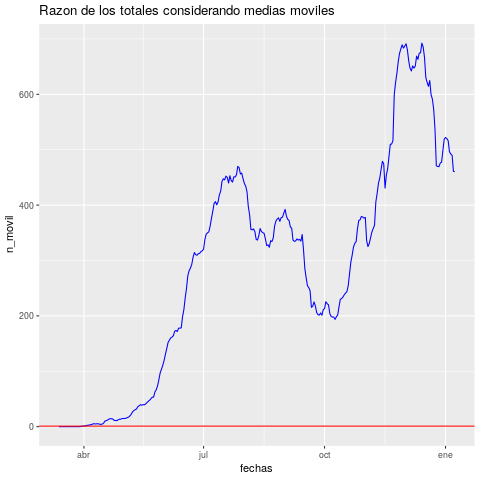

In [55]:
%%R
g_razon_3 <-ggplot(data=razon_fechas, aes(fechas, n_movil)) +
  geom_line(color="blue")+
  labs(title="Razon de los totales considerando medias moviles")+
  geom_hline(yintercept=1, color="red")
g_razon_3

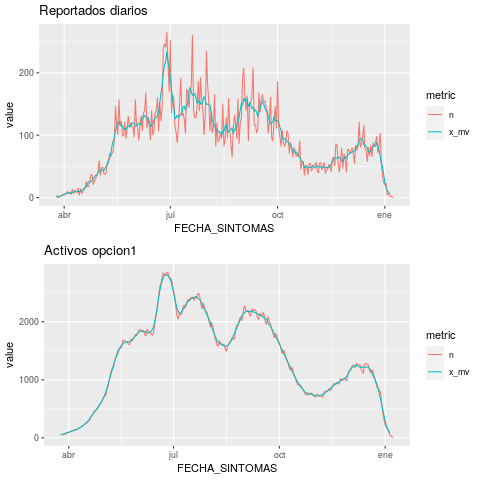

In [232]:
%%R
grid.arrange(p1, p3, ncol=1)

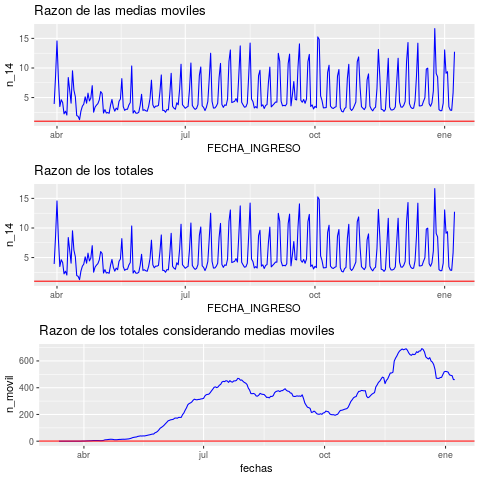

In [43]:
%%R
grid.arrange(g_razon_1, g_razon_2, g_razon_3, ncol=1)